# ADA final exam (Fall 2022)

This exam consists of 3 tasks. Tasks 2 and 3 are independent of each other (although conceptually related).


### Dataset

For a Wikipedia editor to become an administrator, a so-called “request for adminship” ([RfA](https://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship)) must be submitted by either the candidate or another community member. Subsequently, any Wikipedia member may cast a supporting or opposing vote. Here we provide a simplified version of the Wikipedia RfA dataset, containing all votes from 2003 through 2012.


### Data format


- SRC: the user name of the source of the vote, i.e., of the user who cast the vote.
- TGT: the user name of the target of the vote, i.e., of the user running for election.
- VOT: the source's vote on the target (-1 = oppose; 1 = support).
- RES: the outcome of the election (-1 = target was rejected as admin; 1 = target was accepted). **(We will not use this  column in this exam.)**
- YEA: the year of the RfA.
- DAT: the date and time of this vote. **(We will not use this column in this exam.)**
- TXT: the comment written by the source. **(We will not use this column in this exam.)**


|        |   SRC |   TGT |   VOT |   RES |   YEA | DAT                 | TXT                                                                                                                                                                                               |
|-------:|------:|------:|------:|------:|------:|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  39054 |  3444 | 10170 |     1 |     1 |  2009 | 2009-07-01 17:50:00 | '''Support''' - Best of luck. &nbsp;                                                                                                                                                              |
| 159680 |   722 |  9634 |    -1 |    -1 |  2006 | 2006-12-15 07:28:00 | '''Oppose''' Not even 2000 edits.                                                                                                                                                                 |
| 173438 |  4194 |  5524 |     1 |     1 |  2005 | 2005-03-18 19:22:00 | Ohhh, you're Carrp!  In that case, '''Support'''.                                                                                                                                                 |
|  60627 |  4855 |  9436 |     1 |     1 |  2008 | 2008-12-18 23:26:00 | '''Support''' via thoughtful answer to my question that demonstrates this editor has clue.                                                 |
| 194809 |  7687 |   908 |     1 |     1 |  2004 | 2004-09-25 05:21:00 | Nicholas is very good in English. Also, he got '''exceptional''' patience to explain petty obvious facts in talk page to convince ignorants. Let the world be benefitted more out of his work. -- |


### Structural balance theory

**Structural balance theory** affirms that social networks tend to be organized so as to avoid conflictual situations, e.g., if a great friend of yours hates someone, you will likely not befriend that person.

The theory can be operationalized by looking at _triangles_ in an undirected _signed graph_ capturing person-to-person relationships, where a _signed graph_ is a  graph in which each edge is associated with a positive or negative sign, and a _triangle_ is a set of three edges ($\langle u,v \rangle$, $\langle v,w\rangle$, $\langle u,w\rangle$) that fully connect three distinct nodes ($u, v, w$).



_Triangles_ in an undirected signed graph can be in 4 _configurations_:
all positive edges ($\{+,+,+\}$); 
all negative edges ($\{-,-,-\}$); 
two positive edges and one negative edge ($\{+,+,-\}$);
one positive edge and two negative edges ($\{+,-,-\}$).

Structural balance theory posits that social networks tend to favor triangle configurations with an even number of negative signs (i.e., $\{+,+,+\}$ and $\{+,-,-\}$), which can be understood as being “balanced” by avoiding conflictual situations. Intuitively, $\{+,+,+\}$ could be tagged as “The friend of my friend is my friend”, and $\{+,-,-\}$ as “The enemy of my enemy is my friend”, “The friend of my enemy is my enemy”, or “The enemy of my friend is my enemy”. On the contrary, triangle configurations with an odd number of negative signs (i.e., $\{+,+,-\}$ and $\{-,-,-\}$) are unstable (“unbalanced”) according to structural balance theory and will thus occur less frequently in social networks. For instance, me being friends with two mutual enemies ($\{+,+,-\}$) would lead to tension that could be resolved if the two enemies became friends or if I took sides and ended my friendship with one of the two. Similarly, two among three mutual enemies ($\{-,-,-\}$) would have the incentive to form an alliance to “gang up” against the third.

Some social scientists have argued that three mutual enemies ($\{-,-,-\}$) is not necessarily a triangle configuration that social networks tend to avoid. This gives rise to **weak structural balance theory**, which only posits that social networks tend to avoid the “unbalanced” triangle configuration $\{+,+,-\}$.

In a nutshell,
- structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$ as balanced,
  - and $\{+,+,-\}$, $\{-,-,-\}$ as unbalanced;
- weak structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$, $\{-,-,-\}$ as balanced,
  - and $\{+,+,-\}$ as unbalanced.



## Task 1: Preliminaries

As a good data scientist, you first load the data and explore it.

**1.1**
Load the csv file `wiki-RfA.csv.gz` in a pandas dataframe. Calculate the number of distinct RfAs and the average number of votes per RfA.
- **Hint:** Throughout this question, assume that each RfA is uniquely determined by the column `TGT` and each vote is uniquely determined by the combination of `SRC` and `TGT`.

In [2]:
# 1.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./wiki-RfA.csv.gz")
tmp = df.groupby(["TGT"]).SRC.count()
print("Num distinct requests:", len(tmp))
print("Avg num. votes per request:", tmp.mean())
df

Num distinct requests: 3439
Avg num. votes per request: 48.561500436173304


,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,—
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,"'''Oppose'''. This joke really isn't funny, no..."
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,'''Oppose''' as per nomination and answers. --...
3,3750,9966,-1,-1,2012,2012-12-30 22:14:00,'''Oppose''' and '''speeedy close''' this as [...
4,4225,9966,-1,-1,2012,2012-12-30 22:08:00,'''Oppose''' per nomination and answers. I am ...
...,...,...,...,...,...,...,...
166998,3867,2762,1,1,2003,2003-08-23 03:34:00,Also support; Llywrch has been here for ages a...
166999,8091,8486,1,1,2003,2003-08-21 11:47:00,Support. [[User_talk:Fantasy#Thanks!]] and oth...
167000,1581,8767,1,1,2003,2003-08-18 23:16:00,"Support for WikiQuote, but I haven't seen enou..."
167001,1011,8056,1,1,2003,2003-08-16 01:25:00,Support. Does good things with maps. --


### 1.2
In a single figure with three subfigures (one per item), show the following time series:
- the number of RfAs per year;
- the overall fraction of positive votes per year; and 
- the average number of votes per RfA per year.

For each of the above three quantities, print the value for the year 2008.

a) # RfA 2008: 520
b) % Positive votes: 0.7612268475384787
c) Avg. # votes per RfA: 51.60192307692308


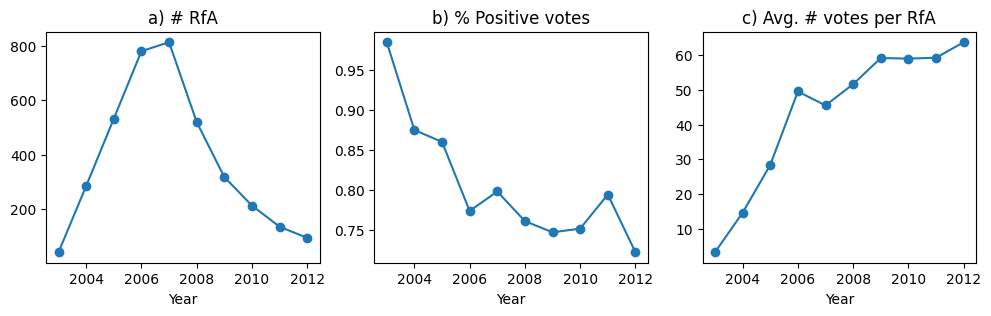

In [11]:
# 1.2 
fig, axs = plt.subplots(1, 3, figsize=(12,3))

tmp = df.groupby(["YEA", "TGT"]).VOT

tmp_a = tmp.count().reset_index().groupby("YEA").VOT.count() 
axs[0].plot(tmp_a ) 
axs[0].scatter(tmp_a.index, tmp_a) 
axs[0].set_title("a) # RfA")
axs[0].set_xlabel("Year")
print("a) # RfA 2008:", tmp_a.loc[2008])

tmp_b = df.groupby(["YEA"]).VOT.apply(lambda x: np.mean(x > 0))
axs[1].plot(tmp_b ) 
axs[1].scatter(tmp_b.index, tmp_b) 
axs[1].set_title("b) % Positive votes")
axs[1].set_xlabel("Year")
print("b) % Positive votes:", tmp_b.loc[2008])

tmp_c = tmp.count().reset_index().groupby("YEA").VOT.mean()
axs[2].plot(tmp_c ) 
axs[2].scatter(tmp_c.index, tmp_c) 
axs[2].set_title("c) Avg. # votes per RfA")
axs[2].set_xlabel("Year");
print("c) Avg. # votes per RfA:", tmp_c.loc[2008])


**1.3** 
**/Discuss:/** Describe the temporal patterns observed in the plots you did in **T1.2**.

**A1.3** 
From the above plots, there appears to be a spike in the number of admin requests in 2006-2007 (a). 
The fraction of positive votes across the years has decreased (b). 
The number of votes cast per RfA has increased (c).

**1.4** 
Create an undirected graph ([`nx.Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html)) where every node corresponds to a Wikipedia user (source or target of an RfA) and where there exists an edge between two users if at least one of them has voted on the other. Each edge should have attributes corresponding to columns of the dataframe, namely:
- `VOT`, which equals `1` if the vote was positive, and `-1` otherwise.
- `YEA`, an integer that represents the year of the RfA.

**The code to load the graph has been provided to you!** After running it, print the number of nodes and edges in your graph.

---

**Observation:** Note that we have at most one edge per pair of nodes in the graph, even though two votes may be associated with the pair  — e.g., if A voted in B's RfA in time $t_1$ and B voted in A's RfA in time $t_2$ ($t_1 < t_2$). In these cases, the code provided associates the metadata of the oldest vote ($t_1$ in the example) to the edge between A and B.

In [3]:
# Provided code! Do not change!
import networkx as nx
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

In [4]:
# 1.4
print("nodes", len(G.nodes()))
print("edges", len(G.edges()))

nodes 10831
edges 161147


**1.5** 
Plot the **complementary** cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

Text(0.5, 0, 'Degree centrality')

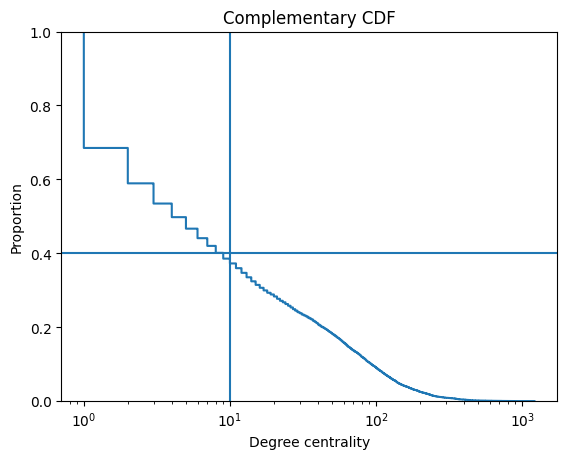

In [5]:
# 1.5
import seaborn as sns
import matplotlib.pyplot as plt

sns.ecdfplot(list(dict(G.degree()).values()), complementary=True)
plt.xscale("log")
plt.axvline(10)
plt.axhline(0.4)
plt.title("Complementary CDF")
plt.xlabel("Degree centrality")


**1.6**
**/Discuss:/** Why is the following statement false? Justify your answer. **"From the graph obtained in task 1.5, one can conclude that around 40% of the users voted at least 11 times."**


**A1.6**
Around 40% of the users had at least degree 11. 
However, the graph counts both receiving and casting a vote as an edge.
Thus, there can be users with degree 11 that cast LESS than 11 votes.
Therefore, 40% is an upper bound and the statement is false.

**1.7**
What fraction of users voted at least 11 times? Use the data to measure the fraction.

In [6]:
# 1.7
import networkx as nx
G_ = nx.from_pandas_edgelist(df, 'SRC', 'TGT', ['VOT', 'RES', 'YEA'], create_using=nx.MultiDiGraph)

tmp = sorted(dict(G_.out_degree()).values())

len([t for t in tmp if t >= 11]) / len(tmp)

0.24863816822084756

In [7]:
# INCORRECT! DOES NOT CONSIDER NODES IN THE GRAPH WITH 0 INCOMING EDGES
frac_11votes = np.sum(df['SRC'].value_counts() >= 11) / len(df['SRC'].value_counts())
print(f'fraction users voting >= 11 times : {frac_11votes:.2f}')

fraction users voting >= 11 times : 0.27


## Task 2: Triangles

Next, you set out to investigate the social balance theory by looking at the RfA graph.

**2.1**
Considering _only_ the RfAs of 2004 (i.e., where `YEA == 2004`), generate all triangles in the undirected graph.
Print the number of triangles found.
- **Hint:** Note that you can generate a graph with only a subset of nodes and edges via ` G.edge_subgraph`.
-  **Hint:** The function `nx.enumerate_all_cliques` generates all cliques in an undirected graph. First, all cliques of size 1 are generated, then all cliques of size 2, etc. Triangles are cliques of size 3.


In [8]:
# 2.1

import networkx as nx
edges_2004 = [i for i, v in nx.get_edge_attributes(G, "YEA").items() if v == 2004]
G_2004 = G.edge_subgraph(edges_2004)

idx = 0
tmp = []
for i in nx.enumerate_all_cliques(G_2004):
    if len(i) < 3: 
        continue
    if len(i) > 3:
        break
    idx += 1
    tmp.append(i)

print("Triangles", len(tmp))

Triangles 8448


**2.2 ** **/True or false:/** Is the following statement true or false? Justify your answer. **"The node with the highest clustering coefficient in an undirected graph is the node that belongs to the largest number of triangles."**

**A2.2** **False**. 

**Intuition:** cluster coefficient is a fraction of closed triangles in ego net. This says nothing about the absolute number of triangles in the ego network (i.e., the network of neighbors).

**Counter example:**
Consider the following counter-example in a graph with 5 nodes: $u_1$, $u_2$ $u_3$, $u_4$ and $u_5$, and 6 edges, 
$\langle u_1, u_2 \rangle$,
$\langle u_1, u_3 \rangle$,
$\langle u_2, u_3 \rangle$,
$\langle u_2, u_4 \rangle$,
$\langle u_2, u_5 \rangle$,
$\langle u_4, u_5 \rangle$.

```
1 ----- 3
 \     /
  \   /
    2
  /   \
 /     \
4 ----- 5

``` 


- $u_1$ has clustering coefficient equals 1, as the only neighbors of the node are connected. 
- $u_1$ belongs to 1 triangle.
- $u_2$ has clustering coefficient equals 1, because $u_4$ and $u_5$ are not connected.
- $u_2$ belongs to 2 triangles.

**2.3** Considering the set of triangles previously calculated, estimate the fraction of triangles of configurations
 $\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, and $\{+,-,-\}$. What fraction of triangles are "balanced" according to structural balance theory?

In [9]:
# 2.3
counter = {
    (-1, -1, -1): 0, # -3
    (-1, -1, 1):  0,  # +1-2
    (-1, 1, 1):   0,   # +2-1
    (1, 1, 1):    0     # +3
}


for tmp_ in tmp:
    x = nx.get_edge_attributes(G.subgraph(tmp_), "VOT")
    x = tuple(sorted([sign for (u, v), sign in x.items()]))
    counter[x] += 1

# normalizes it
for k in counter:
    counter[k] /= len(tmp)

print("{-,-,-}:", 
      round(counter[(-1, -1, -1)], 4) 
)
print("{+,-,-}:", 
      round(counter[(-1, -1, 1)], 4) 
)
print("{+,+,-}:", 
      round(counter[(-1, 1, 1)], 4) 
)
print("{+,+,+}:", 
      round(counter[(1, 1, 1)], 4) 
)

print("Balanced:", round(counter[(-1, -1, 1)] + counter[(1, 1, 1)], 4) )

{-,-,-}: 0.0052
{+,-,-}: 0.0627
{+,+,-}: 0.1394
{+,+,+}: 0.7926
Balanced: 0.8554


**2.4** To observe how triangle configurations would be distributed under a random null model, do the following:
- Create a new column `VOT_RND` in the dataframe, where RfA votes (i.e., edge signs in the graph) are shuffled, i.e., permuted randomly.  For shuffling, use `numpy.random`, without replacement and with the seed 32 (see code provided below).
- Create a new edge attribute with the values of `VOT_RND` in the graph you created in task **1.4**. You can do this easily using the  [`set_edge_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html) function.
- Considering the shuffled edge signs,  compute the fraction of triangles in each configuration ($\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, $\{+,-,-\}$). Moreover, compute the fraction of triangles that are "balanced" according to structural balance theory. (Reminder: consider only the RfAs of 2004.)


In [10]:
# PROVIDED STUB FOR 2.4
import numpy as np
np.random.seed(32)
df_2004 = df[df.YEA == 2004].copy(deep=True)
df_2004["VOT_RND"] = np.random.choice(df_2004["VOT"].values, size=len(df_2004), replace=False)

In [11]:
# 2.4

import numpy as np

attrs_to_add = dict(df_2004.set_index(["SRC", "TGT"]).VOT_RND)


nx.set_edge_attributes(G, name="VOT_RND", values=attrs_to_add)

counter2 = {
    (-1, -1, -1): 0, 
    (-1, -1, 1):  0, 
    (-1, 1, 1):   0, 
    (1, 1, 1):    0  
}

for tmp_ in tmp:
    x = nx.get_edge_attributes(G.subgraph(tmp_), "VOT_RND")
    x = tuple(sorted([sign for (u, v), sign in x.items()]))
    counter2[x] +=1

# normalizes it
for k in counter2:
    counter2[k] /= len(tmp) 

print("{-,-,-}:", 
      round(counter[(-1, -1, -1)], 4), "/ Null: ",
      round(counter2[(-1, -1, -1)], 4),
)
print("{+,-,-}:", 
      round(counter[(-1, -1, 1)], 4),  "/ Null: ",
      round(counter2[(-1, -1, 1)], 4) 
)
print("{+,+,-}:", 
      round(counter[(-1, 1, 1)], 4), "/ Null: ",
      round(counter2[(-1, 1, 1)], 4)
)
print("{+,+,+}:", 
      round(counter[(1, 1, 1)], 4), "/ Null: ",
      round(counter2[(1, 1, 1)], 4) 
)

"Balanced, ", round(counter2[(-1, -1, 1)] + counter2[(1, 1, 1)], 4) 

{-,-,-}: 0.0052 / Null:  0.0019
{+,-,-}: 0.0627 / Null:  0.0344
{+,+,-}: 0.1394 / Null:  0.2779
{+,+,+}: 0.7926 / Null:  0.6857


('Balanced, ', 0.7202)

**2.5** **/Discuss:/** Do the results of tasks **2.3** and **2.4** suggest that structural balance theory is correct? What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) Justify your answer.

**A2.5** The fraction of balanced triangles of the original (real) graph is higher than that of the random shuffled (null) graph, which suggests that Structural Balance Theory is correct, since balanced patterns are more frequently observed than random. To show the results are not obtained simply by chance, one could use bootstrap to obtain confidence intervals.

### Interlude: Additional data

In the data provided in the file `wiki-RfA.csv.gz` (with which you’ve worked up to now), each column corresponds to a vote from a user $u$ to a user $v$ at a time $t$. 

In **Task 2**, we did not consider the temporal aspect of this network. For the next task, you are provided with a complimentary dataset (`data/wiki-RfA_extra.csv.gz`) containing, for each vote (uniquely determined by `SRC` and `TGT`), a variety of features. **Importantly, these features were calculated considering only data that was already available at the time when the respective vote was cast.** The features are described as follows.

- `PP`, `NN`, `PN` — Each vote (signed edge) is part of zero or more triangles, and we computed the number of triangles in which the two remaining edges were both positive (`PP`), both negative (`NN`) and of different signs (i.e., one positive and one negative, `PN`). This considers only the votes that the target (denoted by `TGT`) has received before the current vote. 

- `P`, `N` — The number of positive (`P`) and negative (`N`) votes that the target `TGT` received before the current vote.

- `TXT_PROCESSED` — The text in the original dataset, processed so 1) it is entirely lower-case, 2) it does not contain non-alphanumeric characters, and 3) it does not contain words starting with “supp” or “opp” (since words such as "support" and "oppose"  are obvious give-away signals of the vote).

### Interlude: Predicting edge signs with structural balance theory

We can use structural balance theory to predict edge signs. 

Consider an edge whose sign we do not know, as well as the fractions `PP`, `NN`, and `PN` associated with the edge, as defined above. 

According to structural balance theory, if `PP` + `NN` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

According to the weak structural balance theory, if `PP` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

Note that in both cases we use “$\geq$” rather than “<”, i.e., when both sides of the equation are equal, we break ties in favor of positive edges. We do so because there are more positive edges in the graph.

### Task 3: Predict it!

In the final part of the exam, you will leverage your machine learning and regression skills.

**3.1** Merge the new dataset with the original dataframe from task **1** using the columns `SRC` and `TGT`. You may drop the old `TXT` column if you want to. 


In [12]:
new_df = pd.read_csv("wiki-RfA_extra.csv.gz")
merged_df = merged = pd.merge(df, new_df, how='inner', on=["SRC", "TGT", "YEA"])

merged_df

,index,SRC,TGT,VOT,RES,YEA,DAT,TXT,PP,NN,PN,N,P,TXT_PROCESSED
0,7449,5943,9966,-1,-1,2012,2012-12-30 22:27:00,—,2,0,4,12,0,
1,7448,9153,9966,-1,-1,2012,2012-12-30 22:25:00,"'''Oppose'''. This joke really isn't funny, no...",2,1,3,11,0,this joke really isn t funny not even if you ...
2,7447,4189,9966,-1,-1,2012,2012-12-30 22:17:00,'''Oppose''' as per nomination and answers. --...,0,0,2,10,0,as per nomination and answers
3,7446,3750,9966,-1,-1,2012,2012-12-30 22:14:00,'''Oppose''' and '''speeedy close''' this as [...,0,0,0,9,0,and speeedy close this as wp snow as it s cle...
4,7445,4225,9966,-1,-1,2012,2012-12-30 22:08:00,'''Oppose''' per nomination and answers. I am ...,0,0,1,8,0,per nomination and answers i am particularly ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166998,198176,3867,2762,1,1,2003,2003-08-23 03:34:00,Also support; Llywrch has been here for ages a...,0,0,0,0,0,also llywrch has been here for ages and done n...
166999,198172,8091,8486,1,1,2003,2003-08-21 11:47:00,Support. [[User_talk:Fantasy#Thanks!]] and oth...,0,0,0,0,0,user talk fantasy thanks and other of his act...
167000,198204,1581,8767,1,1,2003,2003-08-18 23:16:00,"Support for WikiQuote, but I haven't seen enou...",0,0,0,0,0,for wikiquote but i haven t seen enough evide...
167001,198079,1011,8056,1,1,2003,2003-08-16 01:25:00,Support. Does good things with maps. --,0,0,0,0,0,does good things with maps


**3.2**  Create the following two rule-based classifiers, and for each, estimate its area under the ROC curve (a.k.a. “AUC/ROC”) on the entire dataset:

- **A)** a classifier inspired by structural balance theory. The classifier should predict a positive vote if  `PP` + `NN` $\geq$ `PN`, and a negative vote otherwise.
- **B)** a classifier inspired by weak structural balance theory. The classifier should predict a positive vote if `PP`  $\geq$ `PN` and a negative vote otherwise.

In [13]:
# 3.2
from sklearn.metrics import roc_auc_score

# A)
y = (merged_df.VOT.values == 1).astype(int)
y_pred = (merged_df.PP + merged_df.NN >= merged_df.PN).astype(int)
print("A) roc score", roc_auc_score(y, y_pred))

# B)
y = (merged_df.VOT.values == 1).astype(int)
y_pred = (merged_df.PP >= merged_df.PN).astype(int)
print("B) roc score", roc_auc_score(y, y_pred))



A) roc score 0.525390127858417
B) roc score 0.528036104766419


**3.3** To determine if the differences in the classifiers from task **3.2** occur solely due to chance, follow the following bootstrap procedure, using 200 iterations:

- **A)** Randomly sample the entire dataset (i.e., votes from the dataframe constructed in task **3.1**) with replacement;
- **B)** Compute the difference of the AUC/ROC for the two classifiers on the entire dataset.

Then use the distribution of AUC/ROC differences (one difference per bootstrap iteration) to estimate the 95% confidence interval for the AUC/ROC difference.

In [14]:
# 3.3 

BF = []

for i in range(200):
    df_sample = merged_df.sample(frac=1, replace=True)
    # A)
    y = (df_sample.VOT.values == 1).astype(int)
    y_pred = (df_sample.PP + df_sample.NN >= df_sample.PN).astype(int)
    
    BF1 = roc_auc_score(y, y_pred)

    # B)
    y = (df_sample.VOT.values == 1).astype(int)
    y_pred = (df_sample.PP >= df_sample.PN).astype(int)
    BF2 = roc_auc_score(y, y_pred)
    
    BF.append(BF1 - BF2)

print("95% CI:", np.quantile( np.array(BF), q=[0.025, 0.975]))

95% CI: [-0.00303181 -0.00230568]


**3.4 ** **/Discuss:**/ According to the results in tasks **3.2** and **3.3**, which theory better predicts actual edge signs, structural balance theory or the weak structural balance theory? 


**A3.4** The weak social balance theory makes the better predictions, since its AUC ROC score is significantly (according to the bootstrapped CIs) higher.



**3.5** How accurately can we predict the vote with more sophisticated features and algorithms?

- Create a TF-IDF representation of the text of each vote  using `sklearn`'s vectorizer ([`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) with the parameters `max_features=150` and `stop_words='english'`.
- Split the  dataset into training and test sets using sklearn [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) using parameters `test_size=0.1` and  `random_state=42`.

- Then, train two logistic regression models ([`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)) using parameters `loss='log_loss'` and `max_iter=2000` considering:

    - **1)** the TF-IDF feature vector

    - **2)** the TF-IDF feature vector and the features `PP`, `NN`, `PN`, `P`, and `N` related to the graph.

- Last, report the AUC/ROC of each model in the test set.

In [22]:
# 3.5 Note, we considered several variations here: 
# - dropna vs. fillna 
# - hinge loss vs. log_loss
# - predict vs. predict_proba
# Other small variations were taken into account!

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# These are all the combinations of different things you could have done!
for loss_v, merged_df_, df_type in zip(
        ["hinge", "hinge", "log_loss", "log_loss"],
        [merged_df.fillna(""), merged_df.dropna(), merged_df.fillna(""), merged_df.dropna()],
        ["fillna", "dropna", "fillna", "dropna"]
):
    print("\nloss", loss_v, "/ df_type:", df_type)
    
    # SOLUTION 1: Using the TFIDF before the split, wrong but we accepted it, because instructions were confusing
    vectorizer = TfidfVectorizer( max_features=150, stop_words="english")
    X = vectorizer.fit_transform(merged_df_.TXT_PROCESSED.values).toarray()
    X2 = np.hstack((X, merged_df_[["PP", "NN", "PN", "N", "P"]].values))
    y =  (merged_df_.VOT == 1).values.astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    clf = SGDClassifier(random_state=0, loss=loss_v).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Before split / roc_auc_score (without extra features)", roc_auc_score(y_test, y_pred))
    if loss_v != "hinge":
        y_pred = clf.predict_proba(X_test)[:,1]
        print("(with predict_proba)", roc_auc_score(y_test, y_pred))

    
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=42)
    clf = SGDClassifier(random_state=0, loss=loss_v).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Before split / roc_auc_score  (with extra features)", roc_auc_score(y_test, y_pred))
    if loss_v != "hinge":
        y_pred = clf.predict_proba(X_test)[:,1]
        print("(with predict_proba)", roc_auc_score(y_test, y_pred))

        #SOLUTION 2: Using the TFIDF after the split
    X_train, X_test, _, _ = train_test_split(merged_df_["TXT_PROCESSED"].values, 
                                                        y, test_size=0.1, random_state=42)
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()
    clf = SGDClassifier(random_state=0, loss=loss_v).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("After split / roc_auc_score (without extra features)", roc_auc_score(y_test, y_pred))
    if loss_v != "hinge":
        y_pred = clf.predict_proba(X_test)[:,1]
        print("(with predict_proba)", roc_auc_score(y_test, y_pred))
        
    X2_train, X2_test, _, _ = train_test_split(merged_df_[["PP", "NN", "PN", "N", "P"]].values,
                                                        y, test_size=0.1, random_state=42)

    X_train = np.hstack((X_train, X2_train))
    X_test = np.hstack((X_test, X2_test))

    clf = SGDClassifier(random_state=0, loss=loss_v).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("After split / roc_auc_score (without extra features)", roc_auc_score(y_test, y_pred))
    if loss_v != "hinge":
        y_pred = clf.predict_proba(X_test)[:,1]
        print("(with predict_proba)", roc_auc_score(y_test, y_pred))


loss hinge / df_type: fillna
Before split / roc_auc_score (without extra features) 0.6737970421479251
Before split / roc_auc_score  (with extra features) 0.7255085037258748
After split / roc_auc_score (without extra features) 0.674124579121076
After split / roc_auc_score (without extra features) 0.8072730770455273

loss hinge / df_type: dropna
Before split / roc_auc_score (without extra features) 0.6845838723418747
Before split / roc_auc_score  (with extra features) 0.7959449312904007
After split / roc_auc_score (without extra features) 0.6849575312219962
After split / roc_auc_score (without extra features) 0.7896094743222035

loss log_loss / df_type: fillna
Before split / roc_auc_score (without extra features) 0.7004806878973522
(with predict_proba) 0.8563128457210444
Before split / roc_auc_score  (with extra features) 0.7411868301857975
(with predict_proba) 0.8785897609035239
After split / roc_auc_score (without extra features) 0.6990490909056859
(with predict_proba) 0.8553744425649

**3.6** **/Discuss:**/  According to the results in task **3.5**, does information from the graph help in the task of predicting the vote even when using the text?  What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) 

**A3.6** Yes, because we get an increase in the performance of the model. To obtain confidence intervals we could bootstrap the difference between the classifier with and without the extra information from the graph.

**3.7** Putting on your observational studies hat, run two logistic regressions using `statsmodels`.
- In the first regression, the vote is the outcome, and `PP`, `NN` and `PN` are the predictors.
- In the second regression, the vote is the outcome, and `PP`, `NN`, `PN`, and `N` are the predictors.

In [23]:
# 3.7

import statsmodels.formula.api as smf
merged_df["VOT2"] = (merged_df.VOT == 1).values.astype(int)
smf.logit("VOT2 ~ PP + NN +PN" , data=merged_df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.514594
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   VOT2   No. Observations:               167003
Model:                          Logit   Df Residuals:                   166999
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                 0.01804
Time:                        13:20:43   Log-Likelihood:                -85939.
converged:                       True   LL-Null:                       -87517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2781      0.006    206.255      0.000       1.266       1.290
PP             0.2493      0.007     34.272      0.000       0.235       0.264
NN            -0.6765      0.040    -16.946      0.000      -0.755      -0.598
PN            -0.5509      0.014    -40.304      0.000      -0.578      -0.524
==============================================================================
"""

In [24]:
import statsmodels.formula.api as smf
merged_df["VOT2"] = (merged_df.VOT == 1).values.astype(int)
smf.logit("VOT2 ~ PP + NN +PN + N" , data=merged_df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.487994
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   VOT2   No. Observations:               167003
Model:                          Logit   Df Residuals:                   166998
Method:                           MLE   Df Model:                            4
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                 0.06880
Time:                        13:20:43   Log-Likelihood:                -81496.
converged:                       True   LL-Null:                       -87517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6227      0.008    212.945      0.000       1.608       1.638
PP             0.2535      0.008     33.344      0.000       0.239       0.268
NN            -0.5466      0.040    -13.631      0.000      -0.625      -0.468
PN            -0.4561      0.014    -33.013      0.000      -0.483      -0.429
N             -0.0438      0.000    -89.263      0.000      -0.045      -0.043
==============================================================================
"""

**3.8** **/Discuss:**/   Explain what the coefficient associated with `PP` means in the first regression. Is it in accordance with structural balance theory?

**A3.8** Having two other positive edges in the triangle increase the log odds of a positive edge by around 0.25. This is in accordance with the balance theory; the friend of a friend is a friend.

**3.9** **/Discuss:**/   Compare the coefficients associated with `PN` and `NN` in the first vs. the second regression. Present a reason that may explain this difference.

**A3.9** 
The coefficients associated with `PN` and `NN` increase if you account for the number of negative votes previously received (`N`).

A possible explanation:
- Previous negative votes tell something about the quality of the candidate, decreasing the log odds that they receive positive votes (this can be seen in the second regression).
- When we do not control directly for previous negative votes, the coefficients `NN` and `PN` partially capture previous negative votes.

---

# ADA final exam (Fall 2021)

This exam consists of 2 parts.
The first part has 3 tasks.
The second part has 2 tasks.
The two parts are completely independent of each other.

 Important: The data used for this exam **is not entirely real.** A great deal of it has been artificially created or modified. Conclusions drawn from this data have no real link to reality!

In [1]:
%matplotlib inline

# General
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For graph-related stuff
import networkx as nx

# For regression analyses and statistical tests
import scipy.stats as stats
import statsmodels.stats
import statsmodels.formula.api as smf

# For classification
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Part 1 — Faculty hiring network

For the first part of the exam, you will analyze data from a faculty hiring network. After completing their Ph.D., researchers who want to pursue an academic career must compete for relatively few permanent positions (as “faculty”, i.e., professors) in a highly competitive job market. You will analyze a directed graph that captures the dynamics of this hiring process in the United States:


- Each node $u$ in this graph represents a different American university.
- For each university, we also provide a score that captures how highly  this university is ranked (e.g., Stanford University is ranked more highly than the University of Alabama). The higher the score, the more highly ranked the university.
- Each directed edge $(u,v)$ in this graph represents a hiring decision where someone who did their Ph.D. at university $u$ subsequently was hired by university $v$. Each edge is also associated with a gender label, which specifies if the person hired was a man (M) or a woman (F).
- Note that, when multiple researchers were trained at a given university $u$ and subsequently hired by university $v$, there will be multiple edges pointing from $u$ to $v$, each of which corresponds to a different person.


## Files (in the `./data/part-1/` folder)

- `nodelist.tsv` a tab-separated file containing the nodes of the graph. Recall that each node represents a different university. The file has these columns:
    - `u` — the node index;
    - `score` — the rank of the university (the higher the better);
    - `name` — the name of the university.

- `edgelist.tsv` a tab-separated file containing the edges of the graph. Recall that each edge represents a hiring decision. The file has columns:
    - `u` — the source university, where the person got their Ph.D.;
    - `v` — the target university, where the person was hired;
    - `gender` — the gender of the person.


### Task 1 — (20 points)

1. Using the above files, create the directed graph representing the hiring network using `networkx`.
Each node should contain the attributes `score` and `name`, and each edge should contain the attribute `gender`.
Print the total numbers of nodes and edges in the graph.

2. Create a plot that allows you to easily visualize **(a)** what fraction of all researchers in the graph are hired by the $N$ universities that hire the most; and  **(b)** what fraction of all researchers in the graph are trained by the $N$ universities whose students get hired the most.
Here, $N$ could be any number between 1 and the number of universities.

3. **/Multiple choice:/** Which centrality metric(s) is/are illustrated in the plot you made for the previous subtask? Select all that apply from the list below and **justify your answer.**
    1. Betweenness centrality
    2. In-degree centrality
    3. Out-degree centrality
    4. PageRank centrality




In [2]:
# 1.1

import networkx as nx
import pandas as pd

# Loads the graph

# Comment: This graph should have been loaded as a multigraph, this is because there may be multiple edges between
# the same two nodes. Loading this as a DiGraph colapsed these multiple edges. We choose not to penalize students
# that loaded the graph as a DiGraph, even though results differed sligthtly!
G = nx.MultiDiGraph()
edge_list = pd.read_csv("./data/part-1/edgelist.tsv", sep="\t")
node_list = pd.read_csv("./data/part-1/nodelist.tsv", sep="\t")

# Creates node attributes
for _, node in node_list.iterrows():
    node = dict(node)
    G.add_node(node['u'], score=node['score'], name=node['name'])

# Creates edge attributes
for _, edge in edge_list.iterrows():
    edge = dict(edge)
    G.add_edge(edge['u'], edge['v'], gender=edge['gender'])
    
# Print number of edges
print("Number of nodes", len(G.nodes))
print("Number of edges", len(G.edges))

Number of nodes 205
Number of edges 4388


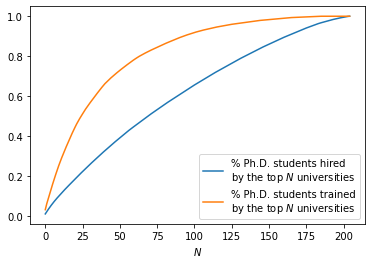

In [3]:
# 1.2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get indegree and outdegree distributions
indegree = []
outdegree = []
for node in G.nodes:
    indegree.append(len(list(G.predecessors(node))))
    outdegree.append(len(list(G.successors(node))))
indegree = np.array(indegree)
outdegree = np.array(outdegree)

indegree = np.array(sorted(indegree/sum(indegree), reverse=True)).cumsum()
outdegree = np.array(sorted(outdegree/sum(outdegree), reverse=True)).cumsum()

# Makes ecfplot
plt.plot(indegree, label="% Ph.D. students hired\nby the top $N$ universities")
plt.plot(outdegree, label="% Ph.D. students trained\nby the top $N$ universities")
plt.xlabel("$N$")
plt.legend()
plt.show();

**Task 1.3** B and C

The centrality metrics illustrated in the plot in 2.1 capture the indegree and the outdegree distribution of the graph we just created:

- When we look at the "percentage of all Ph.D. students hired by the top $N$ universities" we are looking at the indegree distribution.
- When we look at the "percentage of all hired Ph.D. students trained by the top $N$ universities" we are looking at the outdegree distribution.

**Task 1.4** False

Universities are prestigious not because they hire people, but because people who are trained there are hired elsewhere. Thus, a directed edge (u,v) in this graph cannot be understood as an "endorsement" which is what is captured by the pagerank centrality metric.

### Task 2 — (15 points)

Each hiring decision $(u,v)$ connects two different universities with different scores.

1. Divide the universities into quintiles according to their scores ($Q_1$ to $Q_5$, where $Q_5$ contains the highest-ranked universities, i.e., those with the highest scores). Create a succinct plot that captures, for each pair of quintiles ($Q_i$, $Q_j$), what fraction of people in the dataset who got their Ph.D. from a university in $Q_i$ were hired by a university in $Q_j$.


2. **/Multiple choice:/** What does the plot made in the previous subtask reveal about the faculty hiring process? Select one of the following options and justify your answer.
    1. Ph.D. graduates who are hired as professors usually go to universities that are better than the universities where they were trained.
    2. Ph.D. graduates who are hired as professors usually go to universities that are around the same or worse than the universities where they were trained.

3. **/True or false:/** Let $E$ be the set of edges from the hiring network, and let $X$ be defined as follows:
$$X = \frac{|(u,v) \in E : u \in Q_1 \text{ and } v \in Q_5 |}{{|(u,v) \in E : u \in Q_1|}}$$
 *Thinking critically about the data that was given to you,* is the following statement **true** or **false**? Justify your answer. **"If I get my Ph.D. in a 1st-quintile university, I have a chance of around X * 100%  of getting a job in a 5th-quintile university."**


---
**Hints:**
- [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) makes splitting data into quantiles easy!


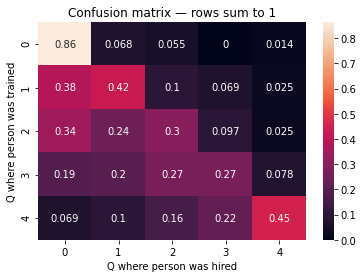

In [4]:
# 2.1

import pandas as pd

arr = np.zeros(shape=(5,5))
diff = []
scores_dict = nx.get_node_attributes(G, "score")

quintiles = pd.qcut([v for _, v in sorted(scores_dict.items())], q=5, labels=False)
keys = [k for k, _ in sorted(scores_dict.items())]
quintiles_dict = {k: v for k, v in zip(keys, quintiles)}

for u, v, k in G.edges:
    arr[quintiles_dict[u], quintiles_dict[v]] += 1

    diff.append(scores_dict[v] - scores_dict[u])


arr = arr.T / arr.sum(axis=1)
sns.heatmap(arr.T, annot=True)
plt.ylabel("Q where person was trained")
plt.xlabel("Q where person was hired")
plt.title("Confusion matrix — rows sum to 1")
plt.show();

# A heatmap is a good plot for this scenario because it allows to easily and succintly visualize all the 
# 25 quintile combinations. Different quintiles are positioned conveniently positioned in a easy-to-read
# way. This would not be the case with other plots (e.g., a simple point-plot)

**2.2** B  

The plot reveals that there is little upwards mobility in the academic hiring process. For example, very few people that were trained in a university in Q4 go on to be hired in a university in Q0

**2.3** False

One shortcomming of the data at hand is that we do not get any information about individuals trained at a given (american) university that never go on to get hired by another (american) university. It could be that all universities train the same amount of Ph.D. students but that those in the worse universities almost never get hired.

### Task 3 — (25 points)

Let the "source university" of a person be the university at which the person got their Ph.D., and let their "target university" be the university at which they were hired after their Ph.D.

1. For each hiring decision $(u, v)$, let the score gain ($d$) be defined as the difference between the scores of the target university and the source university (target university score minus source university score; see hint for example). Calculate the average difference for men ($\bar{d_{M}}$) and for women ($\bar{d_{F}}$) in the dataset. Determine whether the difference between these two averages ($\bar{d_{M}}$ and $\bar{d_{F}}$) is statistically significant.

2. **/True or false:/** Is the following statement **true** or **false**? Justify your answer. "The results you obtained in Task 3.1 do not refute the hypothesis that women are disadvantaged in the faculty hiring process."

3. For each quintile $Q$ from Task 2.1, calculate the following: **(a)** the percentage of women among hiring decisions $(u, v)$ with $u \in Q$ ; and **b)** the average score gain for hiring decisions $(u, v)$ with $u \in Q$.

4. **/Discuss:/** Considering the results obtained in Task 3.3, why is comparing the average score gain for men ($\bar{d_{M}}$) and women ($\bar{d_{F}}$) insufficient for determining the causal effect of gender on score gain?

5. Use `statsmodels` to run a linear regression where hiring decisions (edges of the hiring network) are the data points, gender and source-university score are the predictors, and score gain is the outcome. Report the summary of your model.

6. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"The results you obtained in Task 3.5 suggest that academic hiring decisions are unfair to women."**

---
**Hint** — The university with the best score is Stanford University (score 100), and the university with the 10th best score is the University of Washington (score 95.26). If someone was trained at Stanford and then got a job at the University of Washington, their score gain is $95.26 - 100 = -4.74$.

In [5]:
# 3.1

import pandas as pd
import scipy.stats as stats

gender_dict = nx.get_edge_attributes(G, "gender")
diff_m = []
diff_w = []

# Calculate score gains
for u, v, k in G.edges:
    arr[quintiles_dict[u], quintiles_dict[v]] += 1
    if gender_dict[(u,v, k)] == "M":
        diff_m.append(scores_dict[v] - scores_dict[u])
    else:
        diff_w.append(scores_dict[v] - scores_dict[u])

# Print mean score gains for men and women
print(np.mean(diff_m), np.mean(diff_w))

# ttest
stats.ttest_ind(diff_m, diff_w)

-23.255170534459346 -25.20198837639484


Ttest_indResult(statistic=2.5097073505441556, pvalue=0.01211886846683103)

**3.2** True

$\hat{d_M}$ is bigger than $\hat{d_F}$ and this difference is statistically significant. 
In case there is no other confounder, this would indicate that men in the data are, in average, decreasing their institutional score less than women as they go from PhD students to faculty.
In that context, it can't be said that the results refute the statement.

In [6]:
# 3.3

arr = np.zeros(shape=(5,5))
gender_dict = nx.get_edge_attributes(G, "gender")
man_q = np.zeros(5)
wmn_q = np.zeros(5)
diff_q = np.zeros(5)
diff_c = np.zeros(5)

for u, v, k in G.edges:
    q = quintiles_dict[u]
    diff_q[q] += scores_dict[v] - scores_dict[u]
    diff_c[q] += 1
    if gender_dict[(u,v,k)] == "M":
        man_q[quintiles_dict[u]] += 1
    else:
        wmn_q[quintiles_dict[u]] += 1
    
        
_ = [print("Q{}: {}% of women".format(idx + 1, round(q * 100, 2))) for idx, q in enumerate(wmn_q /(man_q + wmn_q))]

print("---")
_ = [print("Q{}: avg score diff {}".format(idx + 1, round(q, 2))) for idx, q in enumerate(diff_q / diff_c)]

Q1: 10.96% of women
Q2: 20.0% of women
Q3: 29.92% of women
Q4: 40.22% of women
Q5: 51.12% of women
---
Q1: avg score diff 2.22
Q2: avg score diff -1.69
Q3: avg score diff -14.24
Q4: avg score diff -23.43
Q5: avg score diff -27.27


**3.4** It is not appropriate because the score of the source university is a confounder. Better ranked universities have more women *and* have, in average, lower score gain.

In [7]:
# 3.5

# Build a dataframe

gender_dict = nx.get_edge_attributes(G, "gender")
df = []

for u, v, k in G.edges:
    df.append(
    {   
        "gender": gender_dict[(u,v,k)] == "F",
        "d": scores_dict[v] - scores_dict[u],
        "q": scores_dict[u],
    }
    )

df = pd.DataFrame(df)

import statsmodels.formula.api as smf
df
model = smf.ols("d ~ gender + q", data=df.reset_index()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           2.48e-48
Time:                        14:33:50   Log-Likelihood:                -20347.
No. Observations:                4388   AIC:                         4.070e+04
Df Residuals:                    4385   BIC:                         4.072e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.4502      1.435     -2.404      0.016      -6.264      -0.636
gender[T.True]     0.1501      0.770      0.195      0.845      -1.360       1.660
q                 -0.2613      0.018    -14.771      0.000      -0.296      -0.227
==============================================================================
Omnibus:                      237.344   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.048
Skew:                          -0.428   Prob(JB):                     3.27e-42
Kurtosis:                       2.442   Cond. No.                         314.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.6** False, because after we controlled for the score of the university where people did their Ph.D. at, we find that gender is not significant!

## Part 2 — Tennis interviews

For the second part of the exam, you will work with text data extracted from questions asked during post-match tennis interviews and from
TV commentary done during the tennis match.


Examples of interview questions:

> That last set seemed like a faultless performance. Is that the way you saw it?

> How disappointing is that loss for you?

> As a spectator, would you rather watch a guy with big aces or a match with lots of rallies?

Example of commentary text:

>  Serena is desperate to shake herself into action. She lets out an almighty shriek when she goes 30-15 up, but Azarenka responds with a brilliant forehand. The level of Williams' scream goes up and up during the next point, and she lets out another roar when she belts a forehand cross court win the point. She wraps the game up next time round, and she looked something like back to her best there!


## Files (in the `data` folder)

- `questions.tsv.gz` a tab-separated compressed file containing interview questions
and some metadata. We refer to this dataset as the "questions dataset."
Each row contains a question made to a specific player after a match.
The file has the following columns:
    - `questions` — the text of the question asked; **Note that you will never be asked to use this row; it is merely meant to help you understand the data better**.
    - `gender` — the gender of the player;
    - `ranking` — the ranking of the player at the time;
    - `similarity` — this column will be explained later in the exam.

- `commentary.tsv.gz` a tab-separated compressed file containing TV commentary done during
the tennis match. We refer to this dataset as the "commentary dataset." Each line contains
a piece of commentary done in a tennis match.
The file has the following columns:
    - `commentary` — the text of the commentary; **Note that you will never be asked to use this row; it is merely meant to help you understand the data better**.
    - `gender` — the gender of the players in the match;

- `TFIDF.npz`, a file containing 2D numpy arrays saved in the `.npz` format that
will be used in Task 4.

Both datasets are **balanced regarding gender,** i.e., they have the same number of rows about men as about women.


Commentary text, as well as interview questions, have been preprocessed to make your life easier, as follows:

- We replaced all words starting with upper-case letters with the special string `'--ENT--'`. This was done to remove personal names (e.g., Alice, Bob), which could help predict whether the text is associated with a male or a female tennis player.
- We removed the first word in each sentence. This was done because, for the first word of each sentence, it is difficult to know whether it is a personal name or simply a regular word.
- We replaced all gendered pronouns in the text (he/him/his and she/her/hers) with the special string `'--PRON--'`. This, too, was done because these words would make it easy to predict whether the text is associated with a male or a female tennis player.
- We removed punctuation and stop words (to reduce the dimensionality of the data).

The above example commentary text thus appears as follows in the data provided to you:

> desperate shake action lets almighty shriek --PRON-- goes 30 15 --ENT-- responds brilliant forehand level --ENT-- scream goes point --PRON-- lets roar --PRON-- belts forehand cross court win point wraps game time round --PRON-- looked like --PRON-- best

We also provide some code for loading and displaying the dataset:

In [8]:
#  Part 2 ! PROVIDED CODE !

questions = pd.read_csv("./data/part-2/questions.tsv.gz", sep="\t", compression="infer")
commentary = pd.read_csv("./data/part-2/commentary.tsv.gz", sep="\t", compression="infer")

### Task 4  (20 points)

Your goal now is to investigate whether there is gender bias in the questions being asked to female vs. male players, i.e., whether men vs. women are asked different questions on average. You start your analysis with a classification framing.


To make your life easier, we already provided a TF-IDF matrix for each dataset (`commentary.tsv.gz` and `questions.tsv.gz`) and with code to load these matrices (which are numpy arrays).

- Each row in each matrix $M$ corresponds to a row in the corresponding dataframe, i.e., each row corresponds to a different question or a different piece of TV commentary.
- Each column in each matrix corresponds to a different word from the vocabulary.
- Each position $(i,j)$ in the matrix contains the TF-IDF score for word $j$ from the vocabulary in question or commentary $i$. That is, each term $M[i,j]$ corresponds to the term frequency (TF) of word $j$ in text $i$, multiplied by the inverse document frequency (IDF) of word $j$:


$$M[i,j] = \text{TF}(i,j) * \text{IDF}(j)$$


1. **/Multiple Choice:/** Which of the following is the correct way to calculate the term frequency and the inverse document frequency? Justify your answer, explaining what each of the two components should capture.
    - Option A:

    $$\text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option B:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option C:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$

    - Option D:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$



2. Leveraging the matrices described above, train two logistic regression classifiers (one for interview questions, the other for TV commentary) that use the TF-IDF vectors as features to predict the gender of the athletes. You should split each dataset into training and test sets using sklearn (see [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) using parameters `test_size=0.4` and `random_state=42`. You should use sklearn's logistic regression model (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) using parameters `C=10` (which controls regularization) and `max_iter=2000`. For each dataset, train the model on the training set (with 60% of the data) and report the accuracy on the test set (with 40% of the data).

3. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. "Based on the outcome of Task 4.2, the text from tennis commentary text is more gender-biased than post-match questions."

4. The parameter `C` above controls a regularization penalty. The lower `C`, the stronger the regularization penalty (caveat: sklearn’s convention is the reverse of the convention you saw in class, where a *higher* $\lambda$ parameter meant a stronger regularization penalty ). For the questions dataset, re-run the classification task using the same setup as in Task 4.2, but now with `C=2000`. Report the accuracy.

5. **/Discuss:/** Explain why increasing `C` changed the results.


**4.1** D

- TF should capture the occurrence of a word in a given document — so A and C are ruled out.
- IDF should increase as the word becomes rarer across documents — so B is ruled out.

In [9]:
# 4.2 ! PROVIDED CODE !
tmp = np.load("./data/part-2/TFIDF.npz")
TFIDF_commentary = tmp['commentary']
TFIDF_questions = tmp['questions']

TFIDF_questions.shape

(3000, 5497)

In [10]:
# 4.2
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = lm.LogisticRegression(C=10, max_iter=2000)

for df, TFIDF, s in zip([questions, commentary], 
                       [TFIDF_questions, TFIDF_commentary],
                       ["questions dataset", "commentary dataset"]):
    is_woman_questions = (df["gender"] == "F").astype("int").values

    X_train, X_test, y_train, y_test = train_test_split(TFIDF, 
                                                        is_woman_questions,
                                                        test_size=0.4, random_state=42)



    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(s, ":", "accuracy", accuracy_score(y_test, y_pred))

questions dataset : accuracy 0.7108333333333333
commentary dataset : accuracy 0.5133333333333333


**4.3** False. On the contrary, the above results suggest that questions are more gender biased than commentary. It is easier to discern men from women from questions than it is from commentary.

In [11]:
# 4.4
for df, C, s in zip([questions, questions], 
                       [10, 2000],
                       ["C=10", "C=2000"]):
    
    model = lm.LogisticRegression(C=C, max_iter=2000)

    is_woman_questions = (df["gender"] == "F").astype("int").values

    X_train, X_test, y_train, y_test = train_test_split(TFIDF_questions, 
                                                        is_woman_questions,
                                                        test_size=0.4, random_state=42)



    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(s, ":", "accuracy", accuracy_score(y_test, y_pred))

C=10 : accuracy 0.7108333333333333
C=2000 : accuracy 0.69


**4.5** We are performing classification tasks in spase matrices where the number of features outnumber the number of datapoints. Thus, the lack of regularization can lead to overfitting. When we increase C we decrease the regularization penalty and thus increase overfitting.

### Task 5 — (20 pts)

You will now further inspect whether there is gender bias in the interview questions using an observational study framing. For this task, you will use the column `similarity` provided in the questions dataframe. This column captures how similar each question is to tennis-related text, i.e., a higher score indicates that the question is more about the topic of tennis. In contrast, a lower score means that the question may be personal or about other subjects.

1. Using `statsmodels`, run a linear regression with `similarity` as the outcome and `gender` as the predictor. Report the summary of your model.

2. **/True or false:/** According to the previous analysis, determine if the following statement is **true** or **false** and justify your answer. "Men are asked questions unrelated to tennis more often than women."

3. The ranking of players is a potential confounder here. We do not know whether the male and female players in the dataset have similar rankings. In that context, compute the average ranking for men and women. Determine if the difference is statistically significant. Additionally, create a scatter plot showing the relationship between ranking (on the y-axis) and similarity (in the x-axis) and compute Spearman's rank-correlation coefficient between `ranking` and `similarity`.

4. **/True or false:/** Assume that no variable other than `gender` and `ranking` can have any influence on the `similarity` of each question. Based on the analysis of the previous question, is the following statement **true** or **false**? Justify your answer. **"Ranking is not a worrisome confounder for the regression of Task 5.1."**

In [12]:
# 5.1
import statsmodels.formula.api as smf

smf.ols("similarity ~ gender", data=questions).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             similarity   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     841.1
Date:                Sat, 12 Feb 2022   Prob (F-statistic):          3.16e-163
Time:                        14:33:57   Log-Likelihood:                 77.527
No. Observations:                3000   AIC:                            -151.1
Df Residuals:                    2998   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3750      0.006     60.804      0.000       0.363       0.387
gender[T.M]     0.2499      0.009     29.002      0.000       0.233       0.267
==============================================================================
Omnibus:                      134.873   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.331
Skew:                          -0.095   Prob(JB):                     1.31e-13
Kurtosis:                       2.338   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5.2** False. The results of the above regression suggest that women are asked unrelated question the most. 
Note that being a men increases your similarity score by roughly 0.25, which means their questions 
are more closely related to the tennis-related text.

ranking          
              mean       sem
gender                      
F       503.617908  7.564823
M       495.202342  7.386279

SpearmanrResult(correlation=-0.00793480965681015, pvalue=0.663973935968952)

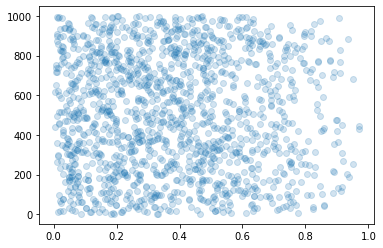

In [13]:
# 5.3
import statsmodels.stats

display(questions.groupby("gender").agg({"ranking": ["mean", "sem"]}))
plt.scatter(questions[questions.gender == "F"].similarity, questions[questions.gender == "F"].ranking, alpha=0.2)
stats.spearmanr(questions.similarity, questions.ranking)

**6.4** True — under the assumptions that no variable other than `gender` and `ranking` can have any
influence on `similarity`, we can rule out ranking as a confounder because it is completely
uncorrelated with the similarity.

# 2020 Welcome to the first-ever (and hopefully last-ever) remote ADA final exam (Fall 2020)

In this exam, you will analyze data from Wikipedia and from the [Wikispeedia](https://dlab.epfl.ch/wikispeedia/play/) game, which you have already encountered in lecture 12 on [“Handling networks”](https://docs.google.com/presentation/d/1h6cIINJ9cNZ-Rtb7SskXrl9Xet5zPUoX2oJlNM0loHQ/edit#slide=id.g464f30ace1_0_92). The rules of the Wikispeedia game are simple:
1. Players are given two Wikipedia articles: a *source* and a *target*.
2. Starting from the source article, the goal is to reach the target, exclusively by following links in the articles encountered along the path.

### The data

The Wikispeedia data comprises ~76K games by human players, thereby capturing human navigation behavior on a very small subset of English Wikipedia comprising ~4.5K articles with a total of ~120K links between them.

The dataset is available in the `data` directory pushed to the same GitHub repo as the exam. Inside the data directory, you will find four files:

####  1. `article_df_task-A.tsv.gz`: A tab-separated file with the following information about Wikipedia articles
- *name*: The name of the Wikipedia article
- *topic*: The top-level topic label for the article (each article is assigned exactly one topic label)
- *content*: The cleaned text of the article (having removed punctuations, stopwords, numbers, and letter casing). It is stored as a space-separated string.

#### 2. `links_task-B.tsv.gz`: A tab-separated file containing Wikipedia links
- *linkSource*: The name of the source Wikipedia article from which the link originates
- *linkTarget*: The name of the target Wikipedia article to which the link points

#### 3.  `paths_df_task-B.tsv.gz`: A tab-separated file with the following information about the played games
- *hashed_ip_address*: Anonymized IP address of the player
- *source*: The name of the Wikipedia article from where the game started
- *target*: The name of the target article that the player was supposed to reach 
- *finished*: Whether the game was successfully finished (whether the player reached the target article)
- *human_path_length*: The number of clicks made by the player, before they either reached the target (in *finished* games) or gave up (in *unfinished* games)
- *shortest_path_length*: The minimum number of clicks required to reach the target article from the source article. Disconnected source-target article pairs have a shortest_path_length of *-1*.
- *duration_in_sec*: The duration of the game in seconds

#### 4.  `paths_df_task-C.tsv.gz`: In continuation to the task-B paths dataframe, this tab-separated file has the following additional information
- *in_degree_target*: In-degree of the target article, that is the number of incoming links that lead to the target article

*Note: In all the aforementioned files, the first line contains the header information. Additionally, article names are URL-encoded. For example, 'Antonín_Dvořák' is stored as 'Anton%C3%ADn_Dvo%C5%99%C3%A1k'. If needed, you can decode the article names using this code: `from urllib.parse import unquote; unquote('article-name')`.*

In [1]:
''' Some minimalistic imports '''
import pandas as pd
import random
import gzip
import operator
import time
from urllib.parse import unquote

import numpy as np
import scipy.stats as stats
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, balanced_accuracy_score

import networkx as nx

from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Task A. Can we predict article topic using textual content?

*Note-1: For the entire Task A, we will use logistic regression for its scalability and simplicity. Specifically, we will use [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) available in `sklearn` with 'log' loss and '5' epochs for training a logistic regression classifier.*

*Note-2: In all the cases where random number generation is required (train-test split, fitting the model, etc.), make sure to use 42 as the random seed.*

### A1. Load the text data and analyze the topic distribution
1. Load `data/article_df_task-A.tsv.gz` as a pandas dataframe.   
   *Note: we have already cleaned the text for you!*
2. Print the total number of unique topics. Additionally, using a plot of appropriate type, analyze the article topic distribution.   
   **/Discuss:/** What do you observe? Are different topics equally likely? If not, is there a large disparity between certain highly popular and very rare topics?

In [2]:
'''your code here''';
articles_content = pd.read_csv('data/article_df_task-A.tsv.gz', sep="\t", compression='gzip')

Total number of unique topics are:  14


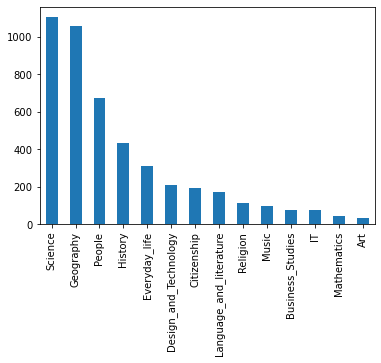

In [3]:
topic_dist = articles_content['topic'].value_counts()
print("Total number of unique topics are: ", len(topic_dist))
topic_dist.plot(kind='bar')
plt.show()

**Answering A1.2:**   
There is a substantial disparity in topic frequency of different topics. Certain topics such as 'Science' and 'Geography' are highly frequent, while others such as 'Mathematics' and 'Art' are super rare.

### A2. Topic classification (multi-class): Articles from 5 most frequent topics

#### A2.1 Prepping the data for ML
1. Restrict the data to articles corresponding to the top-5 topics based on topic frequency.
2. Construct a TF-IDF representation of textual content.
3. Classes are defined by the topic labels, which are given as *strings*. However, for training classifiers via `sklearn` the class labels need to be encoded as ordinals. Perform this encoding and add a new column of ordinal class labels in the current dataframe.
4. Create two numpy arrays: X (TF-IDF representation of each article) and y (class-label of each article).

#### A2.2 Train and evaluate a multi-class classifier
1. Perform a train-test split with 70% as the training portion and the remainder as the testing portion. Use `random_state=42` for fixing the seed to 42.
2. Train a logistic regression classifier with L2 regularization using the `SGDClassifier()` method of `sklearn`. Use `SGDClassifier(loss='log', max_iter=5, tol=None, alpha=1e-4, random_state=42)` to initialize the classifier object. Do not modify the settings for any other parameter, let them be set to their default values.   
   **Important heads-up**: *Depending on the configuration of your computer, training the model could take up to 1 minute of compute time.*
3. Report the classifier performance on the test data using accuracy as the metric.
4. **/Discuss:/** Are you satisfied with the model performance? Qualitatively discuss the performance of the model by comparing it to a random baseline and justify your response.

**Important note:** *Based on the discussion in the class, logistic regression is a binary classification technique. A simple heuristic to perform multi-class classification using a binary classifier is to use the [one-vs.-rest (OVR)](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest) strategy. In this strategy, a binary classifier is trained for each class with the capability to differentiate it from all the other classes, and thus, $k$ binary classifiers are trained for a $k$-class classification. Internally, `SGDClassifier()` uses the [OVR](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) strategy of `sklearn` whenever it sees the number of unique values in the **y** vector to be greater than 2. Thus, you can simply use it as a black-box! The only important point for this part is to make sure that the **y** vector of class-labels should have **5** unique values, one corresponding to each class-label.*

In [4]:
'''your answer/code here''';
top5 = list(topic_dist.index)[0:5]
top5_articles_content = articles_content.loc[articles_content['topic'].apply(lambda x: x in top5)].copy()
'''
another way
top5_articles_content = articles_content.loc[articles_content['topic'].isin(top5)].copy()
'''
factor = pd.factorize(top5_articles_content['topic'])
top5_articles_content['labels'] = factor[0]
top5_definitions = factor[1]
print(top5_definitions)
top5_articles_content.head()

Index(['People', 'Geography', 'History', 'Science', 'Everyday_life'], dtype='object')


,name,topic,content,labels
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People,copyright aedan mac gabrain schools wikipedia ...,0
1,%C3%85land,Geography,copyright aland schools wikipedia selection re...,1
2,%C3%89douard_Manet,People,copyright edouard manet schools wikipedia sele...,0
3,%C3%89ire,Geography,copyright eire schools wikipedia selection rel...,1
4,%C3%93engus_I_of_the_Picts,People,copyright oengus picts schools wikipedia selec...,0


In [5]:
X = top5_articles_content['content'].to_numpy()
y = top5_articles_content['labels'].to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

parameters = {
    'clf__alpha': [1e-4],    
}

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(penalty='l2', loss='log', max_iter=5, tol=None, random_state=42))
])

tstart = time.time()
gs_clf = GridSearchCV(text_clf, parameters, cv=5)
gs_clf = gs_clf.fit(X_train, y_train)
tend = time.time()
print(tend-tstart)

31.59963583946228


In [7]:
print(gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

0.8778912294932049
clf__alpha: 0.0001


In [8]:
predicted = gs_clf.predict(X_test)
print("Accuracy on Test Data: ", np.mean(predicted == y_test))

Accuracy on Test Data:  0.88268156424581


**Answering A2.2.4:**   
In a 5-class classification a random model obtains an accuracy of 20% in expectation. Thus, obtaining an accuracy in high 80s is a strong outcome.

### A3. Topic classification (binary): Articles from the most and least frequent topics

#### A3.1 Train and evaluate a binary classifier
1. Restrict the data to articles belonging to the most frequent or to the least frequent topic.
2. Create two numpy arrays: X (TF-IDF representation of each article) and y (class-label of each article).
3. Perform a train-test split with 70% as the training portion and the remainder as the testing portion. Use `random_state=42` for fixing the seed to 42.
4. Train a logistic regression classifier with L2 regularization using the `SGDClassifier()` method of `sklearn`. Use `SGDClassifier(loss='log', max_iter=5, tol=None, alpha=1e-4, random_state=42)` to initialize the classifier object. Do not modify the settings for any other parameter, let them be set to their default values.
5. Report the classifier performance on the test data using accuracy as the metric.

In [9]:
'''your answer/code here''';
top_and_bottom = list(topic_dist.index)[::len(list(topic_dist.index))-1]
top_and_bottom_articles_content = articles_content.loc[articles_content['topic'].apply(lambda x: x in top_and_bottom)].copy()
'''
another way
top_and_bottom_articles_content = articles_content.loc[articles_content['topic'].isin(top_and_bottom)].copy()
'''
factor = pd.factorize(top_and_bottom_articles_content['topic'])
top_and_bottom_articles_content['labels'] = factor[0]
top_and_bottom_definitions = factor[1]
print(top_and_bottom_definitions)
top_and_bottom_articles_content.head()

Index(['Science', 'Art'], dtype='object')


,name,topic,content,labels
13,16_Cygni,Science,copyright cygni schools wikipedia selection re...,0
14,16_Cygni_Bb,Science,copyright cygni bb schools wikipedia selection...,0
25,1_Ceres,Science,copyright ceres dwarf planet schools wikipedia...,0
41,3_Juno,Science,copyright juno schools wikipedia selection rel...,0
46,47_Ursae_Majoris,Science,copyright ursae majoris schools wikipedia sele...,0


In [10]:
X_small = top_and_bottom_articles_content['content'].to_numpy()
y_small = top_and_bottom_articles_content['labels'].to_numpy()

In [11]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.3, random_state=42)

parameters = {
    'clf__alpha': [1e-4],
}

text_clf_small = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(penalty='l2', loss='log', max_iter=5, tol=None, random_state=42))
])

tstart = time.time()
gs_clf_small = GridSearchCV(text_clf_small, parameters, cv=5)
gs_clf_small = gs_clf_small.fit(X_train_small, y_train_small)
tend = time.time()
print(tend-tstart)

6.040582895278931


In [12]:
print(gs_clf_small.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf_small.best_params_[param_name]))

0.9824056603773584
clf__alpha: 0.0001


In [13]:
predicted_small = gs_clf_small.predict(X_test_small)
print("Accuracy on Test Data: ", np.mean(predicted_small == y_test_small))

Accuracy on Test Data:  0.9707602339181286


#### A3.2 Assessing the evaluation metric
1. **/Discuss:/** What is your take on the accuracy obtained in A3.1? Do you think accuracy is the correct evaluation metric for this task? If yes, justify! If not, why not, and what else can be used?
2. If you included additional evaluation metrics in A3.2.1, then perform an empirical analysis of the performance using these metrics.   
   **/Discuss:/** Additionally, discuss what you observe. Is it harder to predict the topic labels of certain articles? Why, or why not? Please elaborate!

**Answering A3.2.1**   
There is a huge class imbalance, thus, accuracy is not a good metric. It is very easy for accuracy to be biased. If you label everything as the majority class, the accuracy would still be very high (in the high 90s), but the performance on the minority class would be terrible.

In such cases, one can use the either of the following for evaluation.
1. confusion matrix, 
2. balanced accuracy score (sklearn), or 
3. (un)weighted micro/macro averaged F1 scores

**Answering A3.2.2**   
It is hard to correctly predict the topic labels of the articles in the minority class. This could be because of the following reasons:
1. The model didn't see enough training data from the minority class to learn to classify/discriminate it.
2. The loss function treats each training sample as equally important. Thus, trying to minimize the overall loss would  guide the model to focus more on the majority class.

#### At least one of the following should be be used to report the performance. If a reasonable alternate metric is suggested, judge based on it's correctness!

In [14]:
print(confusion_matrix(y_test_small, predicted_small))

[[329   1]
 [  9   3]]


In [15]:
print(balanced_accuracy_score(y_test_small, predicted_small))

0.6234848484848485


In [16]:
print(classification_report(y_test_small, predicted_small, digits=3))

              precision    recall  f1-score   support

           0      0.973     0.997     0.985       330
           1      0.750     0.250     0.375        12

    accuracy                          0.971       342
   macro avg      0.862     0.623     0.680       342
weighted avg      0.966     0.971     0.964       342



#### A3.3 Class proportions
1. **/Discuss:/** Does the disparity in class proportions hurt the model? If yes, how can you fix it? If not, justify the reasons behind your choice.   
   *Hint: The learning objective of a classifier can be modified by altering the importance of each class in the computation of the loss function.*
2. If your answer to the aforementioned question is a "yes", please do the following. If not, move to **Task A4**.
    * Implement the fix you proposed in A3.3.1, and repeat the classification task performed in Step A3.1 using the fixed model.
    * Vary the regularization parameter `alpha` in the range [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], and using accuracy as the metric find and report its optimal value using 5-fold cross validation on the training set.   
       **Important heads-up**: *Depending on the configuration of your computer, grid search for the optimal value of `alpha` could take up to 1 minute of compute time.*
    * Lastly, redo the evaluations proposed in A3.2.   
       **/Discuss:/** Do you observe any differences from the results obtained in A3.2? Why, or why not? Please elaborate!

**Answering A3.3.1**   
As evident from the confusion matrix, the disparity in class proportions does indeed hurt the model. Almost all (99%) of the examples are classified as class 0. What's more, 75% of the articles in class 1, are predicted to belong to class 0.

One way to address this is to employ cost-sensitive learning, i.e., using `class-weight`='balanced' while training the model. Another way could be up/down sampling minority/majority class. 'SMOTE' is a very popular technique of oversampling the minority class that can be employed here.

The solution described below uses `class-weight`='balanced', however, if someone uses 'SMOTE' that's acceptable as well.

**A3.3.2**

In [17]:
parameters = {
    'clf__alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
}

text_clf_small = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(penalty='l2', loss='log', max_iter=5, tol=None, random_state=42, class_weight='balanced'))
])

tstart = time.time()
gs_clf_small = GridSearchCV(text_clf_small, parameters, cv=5)
gs_clf_small = gs_clf_small.fit(X_train_small, y_train_small)
tend = time.time()
print(tend-tstart)

29.97704792022705


In [18]:
print(gs_clf_small.best_score_)
for param_name in sorted(parameters.keys()):
    print("The optimal %s is: %r" % (param_name, gs_clf_small.best_params_[param_name]))

0.9987421383647799
The optimal clf__alpha is: 0.01


In [19]:
predicted_small = gs_clf_small.predict(X_test_small)
print("Accuracy on Test Data: ", np.mean(predicted_small == y_test_small))

Accuracy on Test Data:  0.9941520467836257


#### Similar to A3.2, at least one of the following should be be used to report the performance. If a reasonable alternate metric is suggested, judge based on it's correctness!

In [20]:
print(confusion_matrix(y_test_small, predicted_small))

[[329   1]
 [  1  11]]


In [21]:
print(balanced_accuracy_score(y_test_small, predicted_small))

0.9568181818181818


In [22]:
print(classification_report(y_test_small, predicted_small, digits=3))

              precision    recall  f1-score   support

           0      0.997     0.997     0.997       330
           1      0.917     0.917     0.917        12

    accuracy                          0.994       342
   macro avg      0.957     0.957     0.957       342
weighted avg      0.994     0.994     0.994       342



**Ansering A3.3.2**   
The results are much better now as both the minority and majoirty classes are properly classified. This is evident from the confusion matrix, balanced accuracy score, or macro averaged f1-score.

Using 'balanced' class weights while training the model forces the loss function to give higher relative importance to training samples corresponding to the minority class. Actually, the training samples are weighted as inverse of the class proportions.

### A4. Revisiting Multi-class classifier of A2.2

1. Print and analyze the confusion matrix for the multi-class model trained in A2.2. **/Discuss:/** What do you observe?
2. **/Discuss:/** Similar to A3.3, does the disparity in class proportions hurt the model? If yes, how can you fix it? If not, justify the reasons behind your choice.
3. If your answer to the aforementioned question is a "yes", please do the following. If not, move to **Task A5**.
    * Implement the fix you proposed in A4.2, and repeat the classification task performed in Step A2.2 using the fixed model.
    * Vary the regularization parameter `alpha` in the range [1e-6, 1e-5, 1e-4, 1e-3], and using accuracy as the metric find and report its optimal value using 5-fold cross validation on the training set.   
       **Important heads-up**: *Depending on the configuration of your computer, grid search for the optimal value of `alpha` could take up to 2 minutes of compute time.*
    * Lastly, obtain the accuracy and confusion matrix.
4. **/Discuss:/** Contrast the confusion matrix obtained in A4.1 with the one obtained in A4.3. Do you observe any differences? Why, or why not? Please elaborate!

In [23]:
'''your answer/code here''';
print(confusion_matrix(y_test, predicted))

[[182   3  11   3   1]
 [  1 297   2  17   0]
 [ 26  14  86   3   0]
 [  3   0   0 327   0]
 [ 13   5   1  23  56]]


#### The following two metrics are not required/mandatory per the question!

In [24]:
print(balanced_accuracy_score(y_test, predicted))

0.8151825692708974


In [25]:
print(classification_report(y_test, predicted, digits=3))

              precision    recall  f1-score   support

           0      0.809     0.910     0.856       200
           1      0.931     0.937     0.934       317
           2      0.860     0.667     0.751       129
           3      0.877     0.991     0.930       330
           4      0.982     0.571     0.723        98

    accuracy                          0.883      1074
   macro avg      0.892     0.815     0.839      1074
weighted avg      0.888     0.883     0.877      1074



**Answering A4.1**   
The two least frequent classes have a much higher error than the other three more frequent classes. In fact, the error is somewhat inversely correlated with the frequency of the class. The higher the frequency the lesser the error.

**Answering A4.2**   
As evident from the confusion matrix, the disparity in class proportions does indeed hurt the model.

One way to address this is to employ cost-sensitive learning, i.e., using `class-weight`='balanced' while training the model. Another way could be up/down sampling minority/majority class. 'SMOTE' is a very popular technique of oversampling the minority class that can be employed here.

The solution described below uses `class-weight`='balanced', however, if someone uses 'SMOTE' that's acceptable as well.

In [26]:
parameters = {
    'clf__alpha': [1e-3, 1e-4, 1e-5, 1e-6],
}

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(penalty='l2', loss='log', max_iter=5, tol=None, random_state=42, class_weight='balanced'))
])

tstart = time.time()
gs_clf = GridSearchCV(text_clf, parameters, cv=5)
gs_clf = gs_clf.fit(X_train, y_train)
tend = time.time()
print(tend-tstart)

97.61493825912476


In [27]:
print(gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("The optimal %s is: %r" % (param_name, gs_clf.best_params_[param_name]))

0.8946497443360292
The optimal clf__alpha is: 1e-05


In [28]:
predicted = gs_clf.predict(X_test)
print("Accuracy on Test Data: ", np.mean(predicted == y_test))

Accuracy on Test Data:  0.8966480446927374


In [29]:
print(confusion_matrix(y_test, predicted))

[[178   1  16   3   2]
 [  2 295   5  14   1]
 [ 25   7  96   1   0]
 [  5   1   0 322   2]
 [  7   4   1  14  72]]


#### The following two metrics are not required/mandatory per the question!

In [30]:
print(balanced_accuracy_score(y_test, predicted))

0.8550473737810795


In [31]:
print(classification_report(y_test, predicted, digits=3))

              precision    recall  f1-score   support

           0      0.820     0.890     0.854       200
           1      0.958     0.931     0.944       317
           2      0.814     0.744     0.777       129
           3      0.910     0.976     0.942       330
           4      0.935     0.735     0.823        98

    accuracy                          0.897      1074
   macro avg      0.887     0.855     0.868      1074
weighted avg      0.898     0.897     0.895      1074



**Answering A4.4**   
The results are much better now: the two low frequency classes are now better classified. This is evident from the confusion matrix, balanced accuracy score, or macro averaged f1-score.

Using 'balanced' class weights while training the model forces the loss function to give higher relative importance to training samples corresponding to the classes with lower frequency. Actually, the training samples are weighted as inverse of the class proportions.

### A5. Interpretability
1. For each of the 5-classes considered in **A4**, obtain a list of top-10 words (sorted in descending order of their importance) based on the feature weights learned by the classifier.

2. **/Discuss:/** Qualitatively discuss the relevance of the identified words and their association with the respective class-labels. Is the classifier correct to assign them high weights? Are they truly discriminative/predictive of the respective class-labels? Justify your responses with clear and crisp reasons!

In [62]:
'''your answer/code here''';
top5_coeff_indices = np.argsort(gs_clf.best_estimator_.named_steps['clf'].coef_)[:,-10:][:,::-1]
print(top5_definitions)
np.array(gs_clf.best_estimator_.named_steps['vect'].get_feature_names())[top5_coeff_indices]

Index(['People', 'Geography', 'History', 'Science', 'Everyday_life'], dtype='object')


array([['career', 'born', 'father', 'died', 'work', 'life', 'death',
        'married', 'son', 'later'],
       ['city', 'population', 'river', 'area', 'island', 'geography',
        'sea', 'country', 'islands', 'capital'],
       ['war', 'bc', 'empire', 'century', 'battle', 'gladstone',
        'history', 'burnside', 'roman', 'odysseus'],
       ['species', 'genus', 'classification', 'birds', 'scientific',
        'moon', 'orbit', 'disease', 'energy', 'mol'],
       ['game', 'sleep', 'asparagus', 'dance', 'garden', 'astrology',
        'love', 'lego', 'apricot', 'wrestling']], dtype='<U57')

**Answering A5.2**   
It is quite clear that the top-10 words are discriminative/predictive of the corresponding class-labels.   
For example, 'life', 'death', 'work', 'born', 'career' are quite highly associated with the 'people' class, which is intuitive.   
Similarly, 'roman', 'war', 'empire', 'century' being associated with 'history' class is also quite intuitive.   
Also, similar points can be said about the other classes as well!

## Task B. The Wikipedia link network

### B1. Wikipedia network: reveal your shape!
#### B1.1 Load the Wikipedia link network (`data/links_task-B.tsv.gz`) into memory as a directed graph using `NetworkX`.
1. Compute the following from the loaded graph object:
    * the number of nodes,
    * the number of edges, and
    * the average degree.
2. **/Discuss:/** In order to summarize the degree distribution in a single number, would you recommend using the average degree? Why, or why not? If not, what alternatives can you think of? Please elaborate!

In [33]:
'''your answer/code here''';
flinks = gzip.open("data/links_task-B.tsv.gz")
edgeList = []; nodes = {}; edges = {}
idx = 0
for line in flinks:
    line = line.decode('utf-8').strip()
    if idx==0 or '#' in line or len(line)==0:
        idx+=1
        continue
    line = line.split("\t")
    source = line[0]; target = line[1]
    nodes[source] = True; nodes[target] = True
    edges[(source,target)] = True
    edgeList.append((source,target))
    idx+=1
    
G = nx.DiGraph()
G.add_edges_from(edgeList)
print(len(G.nodes()), len(G.edges()), len(G.edges())/len(G.nodes()))

4592 119882 26.10670731707317


**Answering B1.1.2**   
Average degree is not recommended as the degree distribution of real-world networks usually follows a powerlaw. Summarizing powerlaws with average values is not a good idea, as there is a long tail, and there are many nodes that have very high degree. Instead, median is a better choice.

#### B1.2 Using the appropriate plot type, plot the in-degree and out-degree distributions of the Wikipedia link network and analyze it. 
1. **/Discuss:/** What is the appropriate scale of the axes?
2. **/Discuss:/** Does the distribution (roughly) follow a particular distribution, and if yes, which one? Additionally, explain how you arrived at your conclusion.

In [34]:
'''your answer/code here''';
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

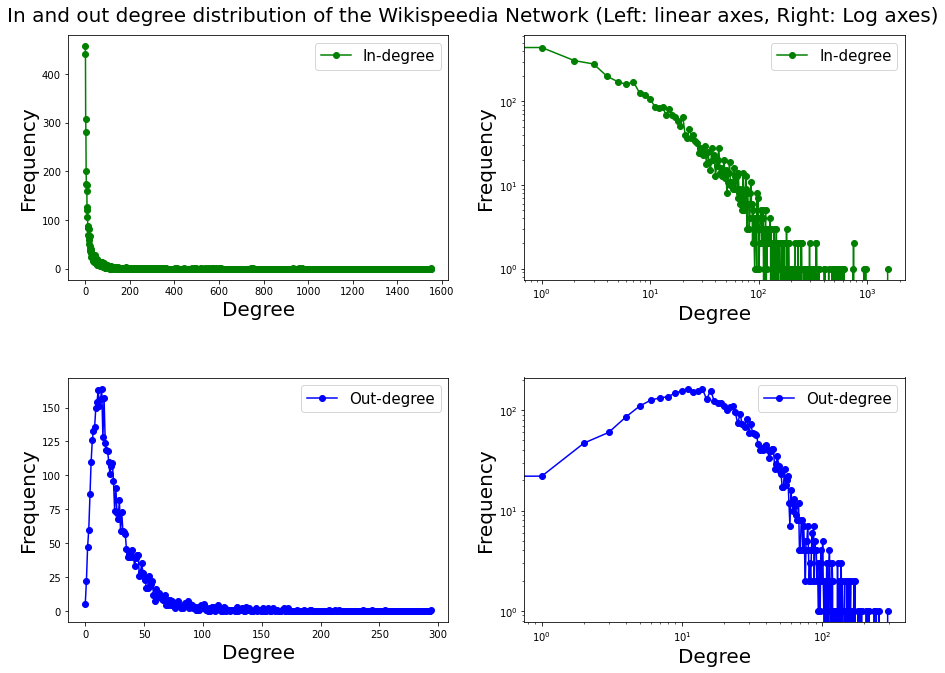

In [35]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
fig, axes = plt.subplots(2, 2, figsize = (15,10),gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
fig.suptitle("In and out degree distribution of the Wikispeedia Network (Left: linear axes, Right: Log axes)", fontsize=20)
axes[0][0].plot(range(len(in_degree_freq)), in_degree_freq, 'go-', label='In-degree')
axes[0][1].loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='In-degree') 
axes[1][0].plot(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='Out-degree')
axes[1][1].loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='Out-degree')
for x in range(0,axes.shape[0]):
    for y in range(0,axes.shape[1]):
        axes[x,y].set_xlabel('Degree', fontsize = 20)
        axes[x,y].set_ylabel('Frequency', fontsize = 20)
        axes[x,y].legend(fontsize=15)
fig.subplots_adjust(top=0.94)
plt.show()

**B1.2.1** Appropriate scale is log-log.   
**B1.2.2** distribution follows powerlaw, linear in the log-log plot.

#### B1.3 Connectedness of the Wikipedia link network

**Definition-1:** An undirected graph $G$ is said to be connected if, for every pair of vertices $(u, v)$, it contains a path that connects the two vertices.

**Definition-2:** A directed graph $G_{dir}$ is **weakly connected** (or simply connected) if the underlying undirected graph obtained by replacing all directed edges of the graph with undirected edges is a connected graph (cf. Definition-1). 

**Definition-3:** A directed graph $G_{dir}$ is **strongly connected** if, for every pair of vertices $(u, v)$, it contains a directed path from $u$ to $v$ and a directed path from $v$ to $u$.

Given these definitions, what can you say about the connectedness of the Wikipedia link network? Specifically, answer the following:
1. Is the Wikipedia link network weakly connected? If not, print the number of weakly connected components. Additionally, print the number of nodes and edges of the subgraph corresponding to the largest weakly connected component.
2. Is the Wikipedia link network strongly connected? If not, print the number of strongly connected components. Additionally, print the number of nodes and edges of the subgraph corresponding to the largest strongly connected component.

In [36]:
'''your answer/code here''';
print("Weakly connected: ", nx.is_weakly_connected(G))
print(f"There are {len(list(nx.weakly_connected_components(G)))} weakly connected components")
print("Strongly connected: ", nx.is_strongly_connected(G))
print(f"There are {len(list(nx.strongly_connected_components(G)))} strongly connected components")

Weakly connected:  False
There are 2 weakly connected components
Strongly connected:  False
There are 519 strongly connected components


In [37]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
H = G.subgraph(list(largest_cc))
print(len(H.nodes()), len(H.edges()), len(H.edges())/len(H.nodes()))

4589 119879 26.123120505556766


In [38]:
largest_scc = max(nx.strongly_connected_components(G), key=len)
H = G.subgraph(list(largest_scc))
print(len(H.nodes()), len(H.edges()), len(H.edges())/len(H.nodes()))

4051 111900 27.6228091829178


### B2. The interplay between human navigation behavior and Wikipedia network structure

#### B2.1 Loading and analyzing the game data (3 points)
1. Load `data/paths_df_task-B.tsv.gz` as a pandas dataframe.
2. Some games were successfully finished (*finished=True*) while others were unsuccessful (i.e., the player gave up before reaching the target article). However, not all unsuccessful games are infeasible; the player might simply not have been good enough at the game to reach the target from the source. **/Discuss:/** Clearly state the reasons why there may be games that are *truly infeasible*.   
3. List all unsuccessful games that are *truly infeasible* and remove them from the dataframe.

**Answering B2.1.2**   
It's impossible to reach a target for games where there is no path existent between the source and the target in the underlying graph, indicated by the shortest_path_length of -1

In [39]:
'''your answer/code here''';
paths = pd.read_csv('data/paths_df_task-B.tsv.gz', sep="\t", compression='gzip')
paths[paths['shortest_path_length'] == -1]

,hashed_ip_address,source,target,finished,human_path_length,shortest_path_length,duration_in_sec
53533,4c03b8fb18fc9752,Oasis_%28band%29,Final_Fantasy_%28video_game%29,False,1,-1,13
56880,3af13b307343dec9,Adolf_Hitler,The_Frogs,False,6,-1,1874
63647,093e40d06992b8dc,Anne_Frank,Final_Fantasy_%28video_game%29,False,21,-1,519
63648,093e42416992ba4d,Anne_Frank,Final_Fantasy_%28video_game%29,False,21,-1,542
64511,17ef27577d43939d,Toy,Lego,False,1,-1,1807
66654,5e55877267bd6864,Hymenoptera,Portuguese_Communist_Party,False,8,-1,264
71566,3d9b105c56bcf38a,Private_Peaceful,Unix,False,1,-1,1804
75567,360d256e3fd2a746,Quantum_mechanics,Blue_Tit,False,15,-1,2464


In [40]:
paths = paths.loc[paths['shortest_path_length'] != -1]

#### B2.2 Wikispeedia => Wikislowia?
1. Compute and report the average and median path lengths for games that were successfully finished (*finished=True*). You should compute and report path length in two ways: (1) with respect to the number of clicks needed by *human players*, (2) with respect to the *minimum* number clicks an *optimal player* would need.   
   **/Discuss:/** What can you say about the navigability of the Wikipedia link network?   
   *Hint: Think about [Milgram's experiment](https://docs.google.com/presentation/d/1h6cIINJ9cNZ-Rtb7SskXrl9Xet5zPUoX2oJlNM0loHQ/edit#slide=id.g464f30ace1_0_261) and relate your findings with his findings!*
2. **/Discuss:/** Suppose you want to maliciously decrease Wikipedia's navigability. You are allowed to remove certain edges in the network. What criterion would you use to decide which edges should be removed? Additionally, discuss why these edges are critical for Wikipedia's navigability. Justify your answer with clear and substantive reasoning!   
   _Hint: Navigability of a network depends on the existence of short paths in the network._
3. **/Discuss:/** In continuation to B2.2.2, assume you are given a budget of $k<<n$ edges to be removed. Design the algorithm that you would employ, provide its pseudocode (as a list of steps), and justify your algorithm design choice.   
   *Note: You don't have to describe the steps for computing the criterion you identified in Step B.2.2. Instead, using the identified criterion as a blackbox, you have to provide the steps required to remove $k>1$ edges.*

In [41]:
'''your answer/code here''';
paths[paths['finished']].describe()

,human_path_length,shortest_path_length,duration_in_sec
count,51314.000000,51314.000000,51314.000000
mean,6.757493,2.845500,158.281814
std,4.680779,0.700748,360.855130
min,1.000000,0.000000,0.000000
25%,5.000000,2.000000,60.000000
50%,6.000000,3.000000,107.000000
75%,8.000000,3.000000,183.000000
max,435.000000,6.000000,35091.000000


**Answering B2.2**
1. The average and median path length based on human navigation in the completed games is 6.75 and 6, respectively. Similar to the 6-degrees of separation results in Milgram's experiment! Also, avg and median shortest path lengths are 2.85 and 3, respectively, which shows that short paths do exist in the network, and the former result shows that they are discoverable by humans without knowledge of the overall network structure.
2. Find the edge with the highest edge betweenness centrality value. Removing such an edge would impact a lot of shortest paths, as the highest fraction of shortest paths pass through this edge.
3. Pseudocode: (Iterative greedy)
   Step-1: Find the edge with the highest betweenness centrality value.
   Step-2: Remove the edge.
   Step-3: Repeat Steps 1 and 2, until k edges have been removed.
   Note: Removing k-edges based on their betweenness centrality in one-go is not the best way to proceed, iterative greedy is better!

#### B2.3 Relationship between network structure and game completion
1. Enrich the dataframe with the in-degree and eigenvector centrality of the target article for each game path.
2. Using plots of appropriate type, plot the in-degree distribution of the target articles of game paths. What is the appropriate scale of the axes? Additionally, summarize the in-degree distribution of the target articles in a single number using a suitable metric. Justify your choice of the metric.
3. Using plots of appropriate type, analyze the differences in in-degree and eigenvector centrality of finished and unfinished games.   
   **/Discuss:/** What do you observe? Clearly discuss your observations!

In [42]:
'''your answer/code here''';
tstart = time.time()
eigenvector_centrality = pd.Series(dict(nx.algorithms.eigenvector_centrality(G)))
in_degree = pd.Series(dict(G.in_degree()))
df_cent = pd.DataFrame([eigenvector_centrality, in_degree]).T.rename({0: "eigenvector_centrality",
                                                                      1: "in_degree"}, axis=1)

paths["eigenvector_centrality_target"] = \
    paths.target.apply(lambda x: df_cent["eigenvector_centrality"][x] 
                      if x in df_cent["eigenvector_centrality"] else None)

paths["in_degree_target"] = \
    paths.target.apply(lambda x: df_cent["in_degree"][x] 
                      if x in df_cent["in_degree"] else None)

paths = paths.loc[~paths.in_degree_target.isna()]
tend = time.time()
print(tend - tstart)

2.0086400508880615


#### B2.3.2: Please note axes labels and titles should be added in the plots presented by the students. Also, we just truncated to max degree of 100 for ease of exposition, such thing is not expected from the students, and if done, should lead to reduction of the points. Also, plots similar to what I made in B1.2 are acceptable (in fact better), and even bar-charts are accepted.

(array([21645., 15117.,  7632.,  4869.,  6033.,  3211.,  2607.,  3660.,
         1546.,  1014.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

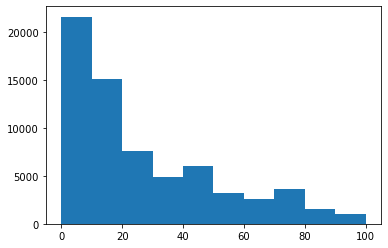

In [43]:
plt.hist(paths["in_degree_target"], range = [0,100])

In [44]:
print(paths["in_degree_target"].mean(), paths["in_degree_target"].median())

49.35447060522895 20.0


#### B2.3.3: Even in this scenario bar-charts are acceptable. More fundamentally, any plot that portrays the differences b/w finished and unfinished games for the said metrics (in-degree and eigenvector centrality) is acceptable!

<AxesSubplot:xlabel='finished', ylabel='in_degree_target'>

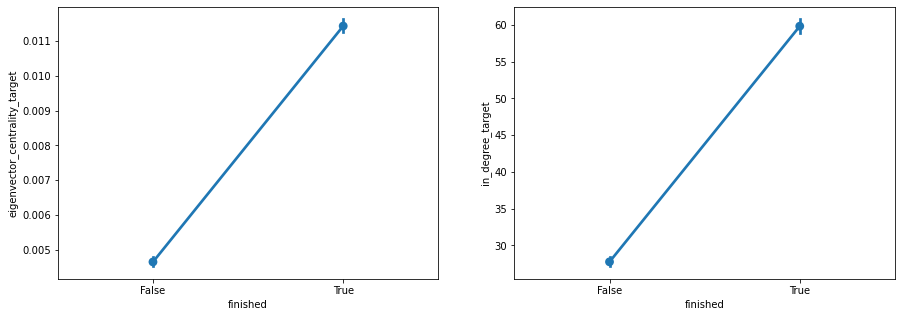

In [45]:
import seaborn as sns
fig, axs = plt.subplots(1,2, figsize=(15, 5))
sns.pointplot(x="finished", y="eigenvector_centrality_target", data=paths, ax=axs[0])
sns.pointplot(x="finished", y="in_degree_target", data=paths, ax=axs[1])

**Answering B2.3.3:**   
The average eigenvector centrality and in-degree of the end nodes is higher for games that were successfully finished when compared to those that weren't. This is an important signal, as it indicates that nodes with higher in-degree (resp. eigenvector centrality) are easier and better targets for human navigation (could result in shorter paths and faster game completion), which is quite intuitive.
It also hints towards the possibility of finding a causal effect, however, further exploration is needed to substantitate that assumption!

## Task C. Putting on the causality hat

### C1. Are articles with high in-degree easier to find? A naive analysis

Recall that in each Wikispeedia game, a player is **randomly** assigned a source article and a target article. In task **C**, we are interested in measuring the effect of the target article's in-degree on the player's chances of successfully finishing the game.

1. Load `data/paths_df_task-C.tsv.gz` as a pandas dataframe.
2. Consider target articles with fewer than 20 incoming links to have a *low in-degree* and articles with at least 20 to have a *high in-degree*.
3. Calculate the fraction of games with a high-in-degree target that was finished, and the fraction of games with a low-in-degree target that was finished. Do you observe significant differences, and in what direction? (You may do a statistical test or provide confidence intervals.)
4. Repeat the same analysis for the game duration, for finished games only.
5. Quantify and discuss your findings from Steps C1.3 and C1.4.

In [46]:
'''your answer/code here''';
paths = pd.read_csv('data/paths_df_task-C.tsv.gz', sep="\t", compression='gzip')
paths["in_degree_binary_target"] = paths["in_degree_target"] >= 20

pfinish_high = (sum(paths.loc[paths["in_degree_binary_target"]].finished)/len(paths.loc[paths["in_degree_binary_target"]]))
pfinish_low = (sum(paths.loc[~paths["in_degree_binary_target"]].finished)/len(paths.loc[~paths["in_degree_binary_target"]]))

print(pfinish_high)
print(pfinish_low)
print(pfinish_high - pfinish_low)

time_high = paths.loc[(paths["in_degree_binary_target"])&paths['finished']].duration_in_sec.mean()
time_low = paths.loc[(~paths["in_degree_binary_target"])&paths['finished']].duration_in_sec.mean()

print(time_high)
print(time_low)
print(time_high - time_low)

0.777918813942271
0.5618646371296548
0.21605417681261618
130.42851548477628
199.57196071791398
-69.1434452331377


#### C1: Note that a statistical significance test (any meaningful test or bootstrapped CIs) is expected from students

**Answering C1:**   
Games with high in-degree targets are 21.61% more *likely to be finished*, and last 69.14 *seconds shorter* if finished.

### C2. Modeling the study setup with a causal diagram

**C2.1** We are interested in the effect of target in-degree (**deg(T)**) on the binary outcome (**O**) that captures whether the game was successfully finished or not. In the previously conducted naive analysis, we did not take into account the shortest path length (**L**), which is the minimum number of clicks necessary in order to reach the target article from the source article (**S**). Target and source articles are randomly assigned, independently from each other. The assigned source article S and deg(T) affect the shortest path length L. The source article affects the outcome through the shortest path length, and also directly, as some sources might be more central in the network. Choose a causal diagram **(A, B, C, D, E, or F)** that corresponds to the described relationships between the 4 variables:
- **deg(T):** target in-degree,
- **L:** shortest path length between source and target,
- **S:** name of source article,
- **O:** outcome, i.e., the binary indicator that says whether the game was successfully finished.

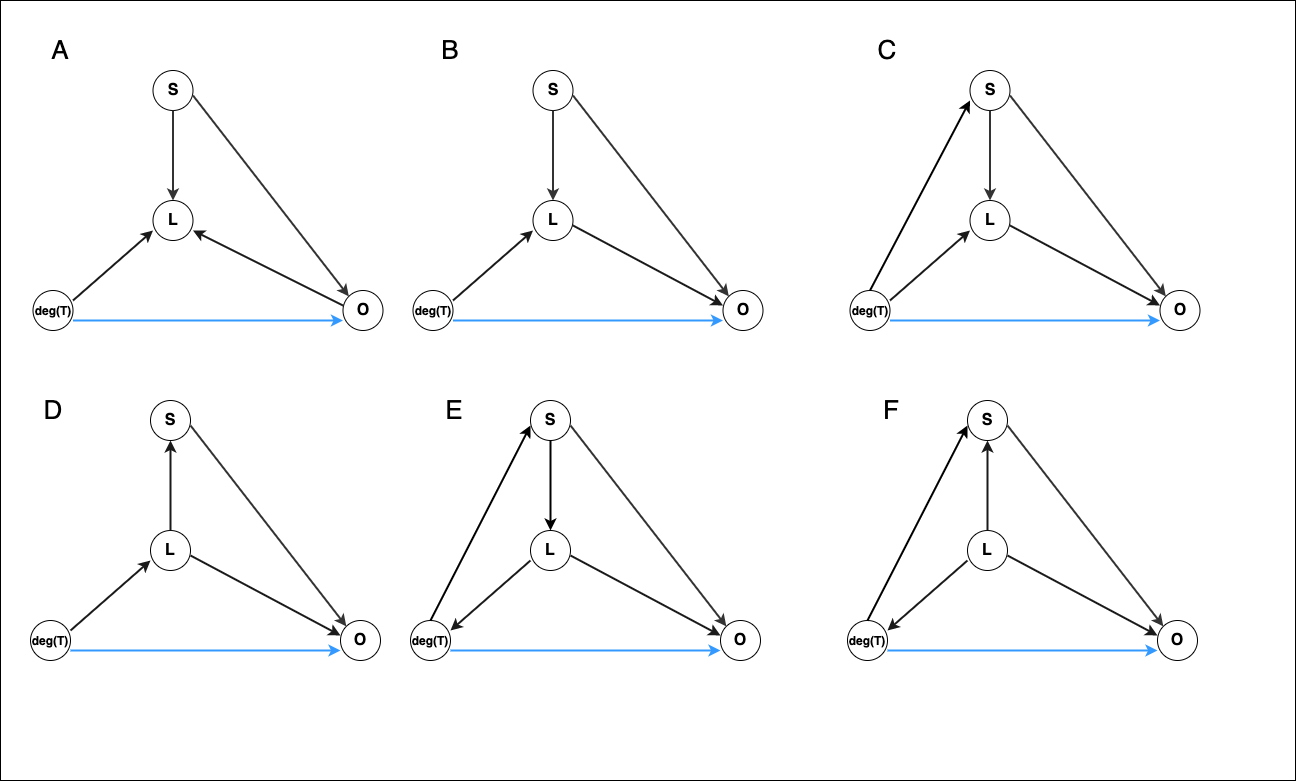

In [47]:
Image(filename="img/diagram.png") 

**Answering C2.1** The correct causal diagram is presented in choice **B**.   

We can elimate C, E, F as there is a effect from T to S, which is not mentioned in the description.   
We can elimate D as there is a effect from L to S whereas the inverse is True.   
We can eliminate A as there is a effect from O to L, where as the inverse is True.

**C2.2** **/Discuss:/** What is potentially misleading about the naive analysis done in task **C1**? In what conceivable ways could the conclusions about the impact of target in-degree **deg(T)** on the outcome **O** be wrong?
Could the findings go in the opposite direction of a true direct causal effect? Justify your answer.

**Answering C2.2** In C1, we are not measuring the direct effect, but the total effect, including the effect mediated through the shortest path length. Possible answers: <br>
a) C1 is a very naive analysis, could come up with any confounder that could reverse the effect. <br>
b) Depending on on the strength and the sign of the mediated impact, since we are measuring the total impact, we could see different results compared to the true direct causal effect.

### C3. A more controlled analysis: matching on source article and shortest path length

Let's now understand how the estimated effect of the target in-degree would differ if we controlled for both the source article and the shortest path length between source and target. Construct a set of matched pairs of games. In a matched pair, the two games differ in target in-degree (one has a high in-degree, and the other has a low in-degree), but the source article and the shortest path length are exactly the same.

1. Perform exact matching on source article and shortest path length. This means that two candidate games can be matched only if the source article and the shortest path length are exactly the same.   
   **Important heads-up**: *Depending on the configuration of your computer, computing the exact matching could take up to 3 minutes of compute time.*
2. Among the matched pairs of games, calculate the fraction of games with a high-in-degree target that was successfully finished, and the fraction of games with a low-in-degree target that was successfully finished. Do you observe significant differences, and in what direction? (You may do a statistical test or provide confidence intervals.)
3. **/Discuss:/** What do you observe? Are the conclusions different from the conclusions reached in C1? If yes, speculate as to why that is the case. How is the estimation in task C1 different from the estimation in task C3?
4. **/Discuss:/** Based on your findings, how should Wikipedia be modified in order to increase the fraction of finished Wikispeedia games?

*Hint: How you construct the set of matched pairs is up to you. One way can be to build an unweighted bipartite graph where games with targets with a high in-degree are on one side (the "treated class"), and games with targets with a low in-degree are on the other side (the "control class"). The edge between two matching candidate games is created only if there is an exact match on the source article and the shortest path length. Based on this bipartite graph, you can then find the optimal matching. However, note that this is neither the required nor the only way.*

In [48]:
'''your answer/code here''';
G_obs = nx.Graph()

vs = set(list(zip(paths.source.values, paths.shortest_path_length.values)))
match_set = set()

max_counter = len(vs)

counter = 0

tstart = time.time()
for source, min_dist in vs:
    counter += 1
    if counter % 1000 == 0:
        print(counter/max_counter)

    high_indegree = paths[(paths.in_degree_binary_target == True) & 
                     (paths.source == source) &
                     (paths.shortest_path_length == min_dist)]

    low_indegree = paths[(paths.in_degree_binary_target == False) & 
                       (paths.source == source) &
                       (paths.shortest_path_length == min_dist)]
    
    tmp_edges = []
    
    for i, f in zip(high_indegree.index, high_indegree.target):
        for j, u in zip(low_indegree.index, low_indegree.target):
            if f != u:
                G_obs.add_edge(i, j)
                match_set.add((i,j))
tend = time.time()
print("Time taken: ", tend-tstart)

0.0800384184408516
0.1600768368817032
0.24011525532255482
0.3201536737634064
0.40019209220425805
0.48023051064510963
0.5602689290859613
0.6403073475268128
0.7203457659676645
0.8003841844085161
0.8804226028493677
0.9604610212902193
Time taken:  146.39946699142456


In [49]:
matching = nx.maximal_matching(G_obs)

In [50]:
high_games_match_cands = {}; low_games_match_cands = {}
for (u,v) in match_set:
    if u not in high_games_match_cands:
        high_games_match_cands[u] = [v]
    else:
        high_games_match_cands[u].append(v)
    if v not in low_games_match_cands:
        low_games_match_cands[v] = [u]
    else:
        low_games_match_cands[v].append(u)

In [51]:
print(len(high_games_match_cands), len(low_games_match_cands))

29541 23047


In [52]:
set_low_games_match_cands = set(low_games_match_cands.keys())
set_high_games_match_cands = set(high_games_match_cands.keys())

In [53]:
print(f'#Matched pairs: {len(matching)}')

#Matched pairs: 12710


#### C3.2: Note that a statistical significance test (any meaningful test or bootstrapped CIs) is expected from students

In [54]:
ntreated = paths.loc[np.array([v[0] if ~paths.loc[v[0], "in_degree_binary_target"] else v[1] for v in matching])]
treated = paths.loc[np.array([v[0] if paths.loc[v[0], "in_degree_binary_target"] else v[1] for v in matching])]
ate = treated.finished.values.astype(int) - ntreated.finished.values.astype(int)
print(np.mean(ate),  stats.sem(ate))

0.14736428009441385 0.004790513286305409


**Answering C3:**

1. **C3.2:** After matching on source page and shortest path, games with high in-degree source are 14.74% more likely to be finished
2. **C3.3:** These differences are smaller compared to how they were before matching, meaning that a lot of the difference can be explained with the mediation through source and the shortest path. However, the direct effect of target in-degree is still significant.
3. **C3.4 (Recommendation):** Modify articles to have more high quality incoming links into them, thereby rendering them as better targets.

# ADA final exam (winter semester 2019/2020)

A friend of yours wants to start a YouTube channel and ideally earn some money via ads. However, there are so many channels and videos out there that your friend has no idea where to even start. Fortunately, they know that you have taken ADA and think you might help them out by analyzing the videos that are currently on YouTube.

The data you are provided with is a subset of YouTube videos, with videos from some of the giant channels in two categories: "Gaming" and "How-to & Style", which are the categories your friend is choosing between. The dataset contains a lot of videos, with data on those videos including their titles, their total number of views in 2019, their tags and descriptions, etc. The data is, in gzip-compressed format, contained in the `data/` folder, as the file `youtube.csv.gz`.

The three tasks A, B and C are **independent** of each other, and you can solve any combination of them. The exam is designed for more than 3 hours, so don't worry if you don't manage to solve everything; you can still score a 6.

You need to run the following two cells to read and prepare the dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
youtube = pd.read_csv('data/youtube.csv.gz', compression='gzip')
youtube.upload_date = pd.to_datetime(youtube.upload_date)

## Dataset description

Each row of the dataset corresponds to one video that was uploaded to YouTube. There are 11 columns:
'channel', 'upload_date', 'title', 'categories', 'tags', 'duration',
       'view_count', 'average_rating', 'height', 'width', 'channel_cat'.
- `channel`: The channel (account) on which the video was uploaded.
- `upload_date`: The date on which the video was uploaded (Pandas Timestamp object).
- `title`: The title of the video.
- `tags`: A list of words that describe the video.
- `duration`: The duration of the video in seconds.
- `view_count`: The number of times the video was watched.
- `average_rating`: The average score with which the viewers rated the video (1-5).
- `height`: The height of the video in pixels.
- `width`: The width of the video in pixels.
- `channel_cat`: The category of the channel on which this video was uploaded. This dataset only contains videos from channels from the 'Gaming' and the 'Howto & Style' category.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

## Task A: Welcome to the exam!

All of Task A refers to the video that were published between and including 2010 and 2018.

### A1: A growing platform?

You would first like to know whether YouTube in general is the right platform to invest time into.

1. Using the appropriate plot type, plot the number of videos published per year between and including 2010 and 2018.

2. Now for each year, plot the number of channels that have been created between the beginning of 2010 and the end of that year. A channel is considered to be created at the time at which they upload their first video.

3. Normalize the number of videos published each year by the number of channels that have been created between the beginning of 2010 and the end of that year, and plot these quantities. Do seperate plots for gaming channels, how-to channels, and both together. Can you conclude from the plot that both gaming and how-to channels have been becoming less and less active recently? Why, or why not?

In [4]:
youtube.head()

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.0,2541550.0,4.886102,720.0,1280.0,Gaming
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.0,1727646.0,4.951531,720.0,1280.0,Gaming
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.0,1402747.0,4.962706,720.0,1280.0,Gaming
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.0,4348296.0,4.937665,720.0,1280.0,Gaming
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.0,1410659.0,4.957545,720.0,1280.0,Gaming


In [5]:
youtube.dtypes

channel                   object
upload_date       datetime64[ns]
title                     object
tags                      object
duration                 float64
view_count               float64
average_rating           float64
height                   float64
width                    float64
channel_cat               object
dtype: object

In [6]:
youtube['upload_year'] = youtube.upload_date.apply(lambda x: x.year)
youtube['upload_month'] = youtube.upload_date.apply(lambda x: x.month)

In [7]:
def calculate_per_year(df, categories, col, year_start, year_end, what='count',
                       keep_duplicates=True, duplicate_cols=None, cumulative=False):
    df_cleaned = df.loc[(df.channel_cat.apply(lambda x: x in categories))&
    (df.upload_year <= year_end) & (df.upload_year >= year_start), 
        ['upload_year', col]].sort_values('upload_year')
    if not keep_duplicates:
        df_cleaned = df_cleaned.drop_duplicates(subset=duplicate_cols, keep='first')
    if what == 'count':
        result_df = df_cleaned.groupby('upload_year').count() + \
            pd.DataFrame(data={col: [0]*(year_end-year_start+1), 
            'upload_year':list(range(year_start,year_end+1))}).set_index('upload_year')
    elif what == 'mean':
        result_df = df_cleaned.groupby('upload_year').mean()
    elif what == 'sum':
        result_df = df_cleaned.groupby('upload_year').sum()
    if cumulative:
        result_df = result_df.fillna(0).cumsum()
    return result_df

In [8]:
youtube.channel_cat.unique()

array(['Gaming', 'Howto & Style'], dtype=object)

In [9]:
cats_chosen = ['Gaming', 'Howto & Style']

## A1.1
The appropriate plot type is a bar chart.

Text(0, 0.5, 'videos')

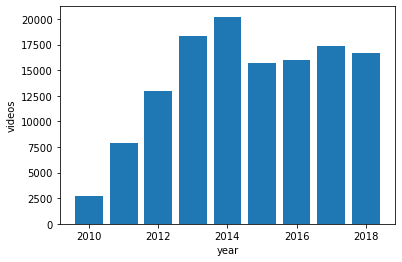

In [10]:
vids_per_year = [calculate_per_year(youtube, [x], 'title', 2010, 2018) for x in cats_chosen]
vids_per_year.append(calculate_per_year(youtube, cats_chosen, 'title', 2010, 2018))
titles = cats_chosen + ['Both']
#fig = plt.figure(figsize=(20,10))
plt.bar(x=vids_per_year[2].index, height=vids_per_year[2].title)
plt.xlabel('year')
plt.ylabel('videos')

## A1.2

Text(0, 0.5, 'channels')

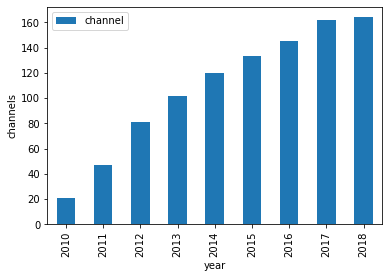

In [11]:
# We don't keep channels that have existed before 2010.
new_channels = youtube[~youtube.channel.isin(youtube.channel[youtube.upload_date < np.datetime64('2010-01-01')].unique())]
channels_per_year = calculate_per_year(new_channels, cats_chosen, 'channel', 2010, 2018, 
                                        keep_duplicates=False, duplicate_cols=['channel'],
                                        cumulative=True)

channels_per_year.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('channels')

## A1.3

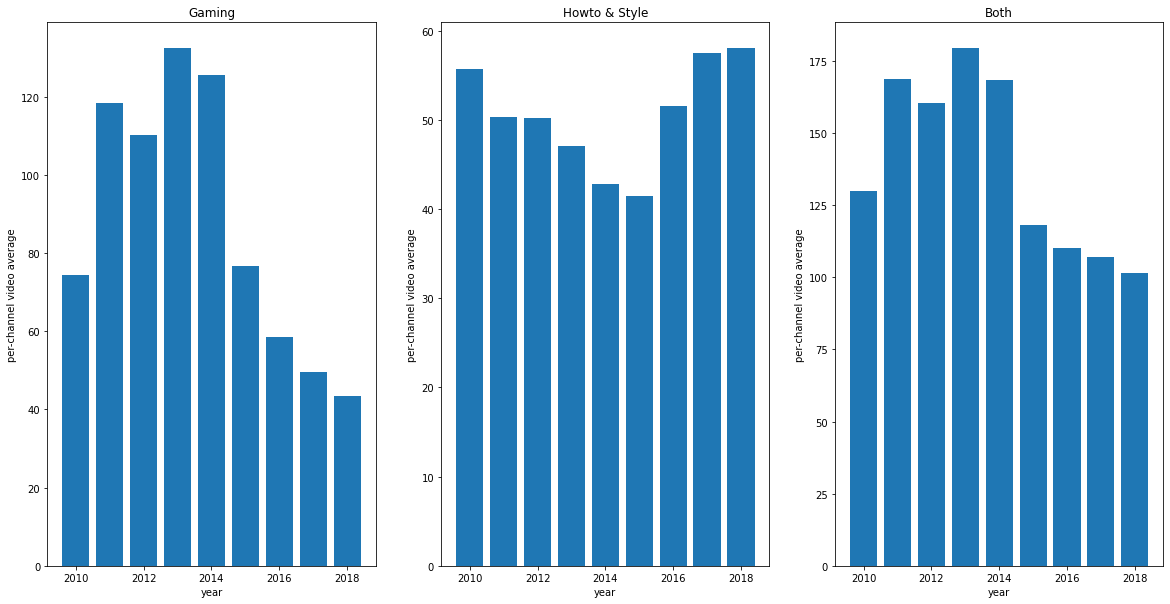

In [12]:
fig = plt.figure(figsize=(20,10))
for i in range(len(vids_per_year)):
    ax = fig.add_subplot(1,3,i+1)
    current_df = vids_per_year[i].join(channels_per_year).\
                    assign(avg_count=lambda x: x['title']/x['channel'])[['avg_count']]
    ax.bar(x=current_df.index, height=current_df.avg_count)
    ax.set_title(titles[i])
    ax.set_xlabel('year')
    ax.set_ylabel('per-channel video average')
#    ax.set_ylim([0,21000])


So together, it seems that activity has gone down, but truth is, gaming has gone down dramatically while howto has risen in recent years.

## A2: The one thing we all love: cash money

Your friend is really keen on making money from their YouTube channel through ads and wants you to help them choose the most profitable channel category (Gaming or Howto & Style). The ad profit is directly proportional to the number of views of a video.

1. Since your friend wants to keep producing videos for several years to come, it might also be worth looking at the growth of the two categories.
  1. Compute the total number of views in each category per year for the years 2010-2018.
  2. Divide the yearly view count by the number of channels that posted a video in each category in each year. Plot these normalized counts.




2. It takes some time for channels to become popular. For this question and all the following questions in A2, only consider channels that uploaded their first video in  2016 or later. Compute the total number of views in each category and divide it by the number of channels in that category.


3. The number of views might be very unevenly over the different channels, and channels might upload different numbers of videos.
  1. Compute the mean number of views per video for each channel.
  2. Compute the mean of these means for each of the two categories. Print these values.
  3. Using bootstrapping, compute 95% confidence intervals for these two means. From this analysis, can you draw a recommendation for one of the two categories? Why, or why not?

## A2.1
### (A)

In [13]:
youtube.loc[youtube.channel_cat == 'Gaming'].view_count.sum()

135986429274.0

In [14]:
youtube.loc[youtube.channel_cat == 'Howto & Style'].view_count.sum()

86493243255.0

### (B)

In [ ]:
cat1_views = calculate_per_year(youtube, ['Gaming'], 'view_count', 2010, 2018, what='sum')
# cat1_views.plot(kind='bar')

In [ ]:
cat2_views = calculate_per_year(youtube, ['Howto & Style'], 'view_count', 2010, 2018, what='sum')
# cat2_views.plot(kind='bar')

In [17]:
channels_cat1 = calculate_per_year(youtube, ['Gaming'], 'channel', 2010, 2018, 'count', keep_duplicates=False, 
                          duplicate_cols=['upload_year', 'channel'])
channels_cat2 = calculate_per_year(youtube, ['Howto & Style'], 'channel', 2010, 2018, 'count', keep_duplicates=False, 
                          duplicate_cols=['upload_year', 'channel'])

Text(0.5, 0, 'upload year')

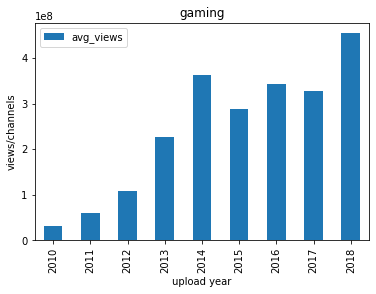

In [18]:
cat1_views.join(channels_cat1).assign(avg_views=lambda x: x['view_count']/x['channel'])[['avg_views']].\
                                plot(kind='bar')
plt.title('gaming')
plt.ylabel('views/channels')
plt.xlabel('upload year')

Text(0.5, 0, 'upload year')

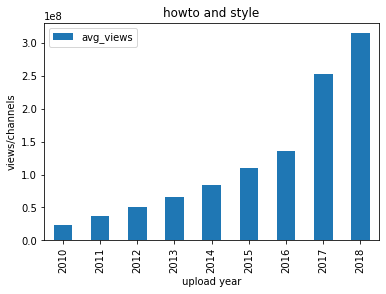

In [19]:
cat2_views.join(channels_cat2).assign(avg_views=lambda x: x['view_count']/x['channel'])[['avg_views']].\
                                plot(kind='bar')
plt.title('howto and style')
plt.ylabel('views/channels')
plt.xlabel('upload year')

## A2.2

In [20]:
channel_starts = youtube[['channel', 'upload_year']].groupby('channel').min().reset_index()
channels_late = channel_starts.loc[channel_starts.upload_year >= 2016].channel.values

In [21]:
channels_late

array(['5-Minute Crafts', '5-Minute Crafts GIRLY', '5-Minute Crafts PLAY',
       'Anaysa', 'Antonio Garza', 'BRICO SYMPA', 'BRIGHT SIDE', 'Blossom',
       'Ceeday', 'Chris Smoove', 'Clash Royale', 'Crafty Panda',
       'Daequan Loco', 'Denis', 'Frost Diamond', 'GameGrumps',
       'Grandpa Kitchen', 'Health Tips for You', 'Homemade solutions',
       'Hong Giang DIY Slime', 'Indian Health', 'Izabela Stress',
       'Jess No Limit', 'MeLlamanFredy', 'SHORT TIME SECRET',
       'Satisfying Slime Videos', 'So Yummy', 'Tasty', 'Tom Slime',
       'Xyz Gyan', 'YourHealth'], dtype=object)

In [22]:
len(youtube.loc[(youtube.channel_cat == 'Howto & Style') & 
            (youtube.channel.apply(lambda x: x in channels_late))].channel.unique())

23

In [23]:
len(youtube.loc[(youtube.channel_cat == 'Gaming') & 
             (youtube.channel.apply(lambda x: x in channels_late))].channel.unique())

8

These two are the answers to A2:

In [24]:
youtube.loc[(youtube.channel_cat == 'Howto & Style') & 
            (youtube.channel.apply(lambda x: x in channels_late))].view_count.sum() / \
            len(youtube.loc[(youtube.channel_cat == 'Howto & Style') & 
            (youtube.channel.apply(lambda x: x in channels_late))].channel.unique())

1374135339.0

In [25]:
youtube.loc[(youtube.channel_cat == 'Gaming') & 
            (youtube.channel.apply(lambda x: x in channels_late))].view_count.sum() /\
            len(youtube.loc[(youtube.channel_cat == 'Gaming') & 
             (youtube.channel.apply(lambda x: x in channels_late))].channel.unique())

895409422.375

Now let's look at the aggregation, per channel. For this aggregation, there are two solutions:
* If you consider the effort spent for each video to be similar, then the average.
* If you only want to consider the total potential revenue, then the sum.

## A2.3A

In [26]:
howto_perchannel_new = youtube.loc[(youtube.channel_cat == 'Howto & Style') & 
            (youtube.channel.apply(lambda x: x in channels_late)), ['view_count', 'channel']].\
            groupby('channel').mean().view_count.values

In [27]:
gaming_perchannel_new = youtube.loc[(youtube.channel_cat == 'Gaming') & 
            (youtube.channel.apply(lambda x: x in channels_late)), ['view_count', 'channel']].\
            groupby('channel').mean().view_count.values

## A2.3B

In [28]:
np.mean(howto_perchannel_new), np.mean(gaming_perchannel_new)

(3371299.2233319054, 1404771.1416982808)

## A2.3C

In [29]:
def do_bootstrap(data, n=1000):
    sample_statistic = [] 
    for _ in range(n):
        sampled_data = np.random.choice(data, size=len(data))  
        sample_statistic.append(np.mean(sampled_data))
    return (np.percentile(sample_statistic, 2.5), np.percentile(sample_statistic, 97.5))

In [30]:
[do_bootstrap(howto_perchannel_new), do_bootstrap(gaming_perchannel_new)]

[(2150921.048323673, 4883514.941399923),
 (941627.6695806755, 1898984.9410688933)]

The difference is significant, as the two confidence intervals have no overlap.

## Task B: View forecasting (Machine Learning)

Your friend wants to figure out how they can optimize their videos for getting the maximum number of views (without using shocking thumbnails and clickbait titles). In this task, you will build a machine learning (ML) model for predicting the success of a video.

## B1: Get those shovels out again

1. For the prediction model, use all rows of the dataset, but keep only the following columns: `view_count, channel, upload_date, duration, average_rating, height, width`.

In [31]:
ml_columns = ['view_count', 'channel', 'upload_date', 'duration', 'average_rating', 'height', 'width']
youtube_ml = youtube[ml_columns].copy()

2. Extract the upload year and upload month from the `upload_date` column into the two columns `upload_year` and `upload_month`, and remove `upload_date`.

In [32]:
youtube_ml['u_year'] = youtube_ml.upload_date.dt.year
youtube_ml['u_month'] = youtube_ml.upload_date.dt.month
youtube_ml = youtube_ml.drop(columns=['upload_date'])

3. The entry in the channel column for a video indicates on which channel the video was uploaded. Encode this column via one-hot encoding.

In [33]:
youtube_ml = pd.get_dummies(youtube_ml, columns=['channel'], prefix='channel_')

4. Split the data into a train (70%) and a test set (30%) with the appropriate function from sklearn, using 42 as the random seed.

In [34]:
train, test = train_test_split(youtube_ml, test_size=0.3, random_state=42)

## B2: Who is the most viewed of them all?

1. Train a ridge regression model (i.e., an L2-regularized linear regression model) on the train set that predicts the view count from the other features. Find and use the optimal regularization parameter $\alpha$ from the set {0.001, 0.01, 0.1} via 3-fold cross validation.

In [35]:
X_train = train.drop(columns=['view_count'])
y_train = train['view_count']
X_test = test.drop(columns=['view_count'])
y_test = test['view_count']

In [36]:
ridge = Ridge()
ridge_hyper = {'alpha':(0.001, 0.01, 0.1)}
ridge_cv = GridSearchCV(ridge, ridge_hyper, cv=3)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': (0.001, 0.01, 0.1)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [37]:
ridge_cv.cv_results_['mean_test_score']

array([0.08010146, 0.08010271, 0.0801151 ])

2. Report the mean absolute error that the model makes on the test set.

In [38]:
mean_absolute_error(y_test, ridge_cv.predict(X_test))

1444649.5039951615

## B3: Checking our ambitions

To improve performance, you want to make the task of the ML model easier and turn it into a classification task. Now it only has to predict whether a video has a high view count (defined as being larger than the median of the view counts in the training set) or a low view count (defined as being smaller or equal to the median of the view counts in the training set).

1. Train a logistic regression model for this classification task. Find and use the optimal regularization parameter C (as defined in scikit-learn's documentation) from the set {1, 10, 100} via 3-fold cross validation. Use the random seed 42. _Hint_: If you get a warning about the training algorithm failing to converge, increase the maximum number of training iterations.

In [39]:
threshold = y_train.median()

y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

In [40]:
Cs = (1, 10, 100)
log_reg_cv = LogisticRegressionCV(Cs=Cs, cv=3, random_state=42, max_iter=200)

In [41]:
log_reg_cv.fit(X_train, y_train_binary)
opt_C = log_reg_cv.C_[0]
opt_C

10

In [42]:
log_reg_cv.scores_[1].mean(axis=0)

array([0.74790585, 0.74791609, 0.74790585])

2. Compute the accuracy of the logistic regression model on the test set.

In [43]:
log_reg_cv.score(X_test, y_test_binary)

0.7479033761020716

## B4: ...something's not right.

You are satisfied with the model performance. In fact, you are a bit surprised at how good the model is given the relatively little amount of information about the videos. So you take a closer look at the features and realize that the (one-hot-encoded) channel feature does not make sense for the application that your friend has in mind.

1. Why does the channel feature not make sense?

Even though your friend knows who will upload their videos (your friend, of course), no video with this channel is in the training set and thus the corresponding one-hot feature does not exist in the model. Thus they wouldn't be able to use the trained model for predictions on their own videos.

2. Train another logistic regression model with all the features from B3 except the one-hot-encoded channel. Use again 42 as the seed for the train test split and perform the same hyperparameter optimization as in B3. How does the model performance change?

In [44]:
youtube_ml = youtube_ml[['view_count', 'duration', 'average_rating', 'height', 'width', 'u_year', 'u_month']]
train, test = train_test_split(youtube_ml, test_size=0.3, random_state=42)
X_train = train.drop(columns=['view_count'])
y_train = train['view_count']
X_test = test.drop(columns=['view_count'])
y_test = test['view_count']

threshold = y_train.median()

y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

In [45]:
log_reg_cv.fit(X_train, y_train_binary)
opt_C = log_reg_cv.C_[0]
opt_C

100

In [46]:
log_reg_cv.score(X_test, y_test_binary)

0.6075311208276587

Without the channel, the accuracy drops by 15 percentage points, and is not that far from uniformly random prediction anymore.

## B5: "We kinda forgot about categories."

On second thought, there is actually one feature that you may use about the channel. Namely, the channel category. The reason this one makes sense might also help you answer B4.1.

1. Train and evaluate another logistic regression model (in the same way as in B4 regarding train/test split and hyperparameter) that additionally includes the one-hot-encoded channel category.

In [47]:
youtube_ml['channel_cat'] = youtube['channel_cat']
youtube_ml = pd.get_dummies(youtube_ml, columns=['channel_cat'], prefix='cat_')

train, test = train_test_split(youtube_ml, test_size=0.3, random_state=1)
X_train = train.drop(columns=['view_count'])
y_train = train['view_count']
X_test = test.drop(columns=['view_count'])
y_test = test['view_count']

threshold = y_train.median()

y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

In [48]:
log_reg_cv.fit(X_train, y_train_binary)
opt_C = log_reg_cv.C_[0]
opt_C

1

In [49]:
log_reg_cv.score(X_test, y_test_binary)

0.6133610493871408

2. The dynamics of the two categories might differ a lot, and the two communities might value different properties of a video differently. For instance, for one community, a long duration might be more important, for the other one, a large picture width. Thus, having only a single weight for, e.g., the duration of a video, might not give the best results. Is there something smarter that you can do than simply including the category as a single one-hot-encoded feature to improve the classification performance? Implement your idea and compare the accuracy on the test set with that of the first model (from task B5.1).

---

We can instead train two separate models, one for each category.

In [50]:
youtube_ml = youtube_ml[['view_count', 'duration', 'average_rating', 'height', 'width', 'u_year', 'u_month']]
youtube_ml_gaming = youtube_ml[youtube['channel_cat'] == 'Gaming']
youtube_ml_howto = youtube_ml[youtube['channel_cat'] == 'Howto & Style']

In [51]:
train_gaming, test_gaming = train_test_split(youtube_ml_gaming, test_size=0.3, random_state=1)
X_train_gaming = train_gaming.drop(columns=['view_count'])
y_train_gaming = train_gaming['view_count']
X_test_gaming = test_gaming.drop(columns=['view_count'])
y_test_gaming = test_gaming['view_count']

train_howto, test_howto = train_test_split(youtube_ml_howto, test_size=0.3, random_state=1)
X_train_howto = train_howto.drop(columns=['view_count'])
y_train_howto = train_howto['view_count']
X_test_howto = test_howto.drop(columns=['view_count'])
y_test_howto = test_howto['view_count']

In [52]:
y_train_binary_gaming = (y_train_gaming > y_train_gaming.median()).astype(int)
y_test_binary_gaming = (y_test_gaming > y_train_gaming.median()).astype(int)
y_train_binary_howto = (y_train_howto > y_train_howto.median()).astype(int)
y_test_binary_howto = (y_test_howto > y_train_howto.median()).astype(int)

Training separate models for the two categories gives slightly better accuracies.

First for the gaming category:

In [53]:
log_reg_cv.fit(X_train_gaming, y_train_binary_gaming)
log_reg_cv.score(X_test_gaming, y_test_binary_gaming)

0.6309681034137752

And then for the howto category:

In [54]:
log_reg_cv.fit(X_train_howto, y_train_binary_howto)
log_reg_cv.score(X_test_howto, y_test_binary_howto)

0.6477528756077315

## Task C: A map of the channels (Graphs)

Your friend wants to map out the channels and represent their similarities. For this purpose, we have created two undirected and unweighted graphs for you, where in each graph, each channel has a node and similar channels have edges connecting them. In one graph, the similarity between two channels is based on how similar their video descriptions are, while in the other, the similarity is based on how similar their video tags are. We will call the former $G_{text}$ and the latter $G_{tags}$. You will be analyzing the two graphs loaded by running the cell below.

In [55]:
from networkx import from_numpy_array
import json
g_text_adj = np.loadtxt(open('data/g_text_adj.csv', 'r'), delimiter=',', skiprows=0)
g_tags_adj = np.loadtxt(open('data/g_tags_adj.csv', 'r'), delimiter=',', skiprows=0)
channel_to_index = json.load(open('data/channel_indices.json', 'r'))
g_text = from_numpy_array(g_text_adj)
g_tags = from_numpy_array(g_tags_adj)

## C1: Does YouTube have a content diversity problem?

1. For each graph, calculate its diameter (i.e., the largest shortest-path length, where the maximization is done over all node pairs). What difference do you see? _Hint_: Don't worry if you get an error, just read the error message carefully.

2. What does the diameter of $G_{text}$ say about the diversity of the channels’ contents? How about the diameter of $G_{tags}$?

3. Based on what you have calculated, which one has greater diversity: descriptions used by channels, or tags used by channels? Justify your answer.

4. Imagine that you want to **compare** content diversity between two sets of channels (i.e., you want to see which set of channels has more diverse content), and you have calculated a tag-based graph for each set. Do you think the diameter is a good measure for doing the comparison? Justify your answer.

5. Back to our own two graphs. Based on $G_{text}$, for each category of channels, which channel is the one most representative of the contents of all channels in that category? In other words, for each category, if you needed to provide a summary of all channels in the category via one channel, which channel would you choose? Show us (us being the exam designers and your friend) the descriptions of this channel’s two most-viewed videos. What metric did you use for this purpose? Explain your choice.

## C2: Going back to categories again

1. We want to use the two graphs to cluster channels from the same category together, and we want to compare their effectiveness at doing so. Use Kernighan-Lin bisection in the networkx package (`networkx.algorithms.community.kernighan_lin_bisection`) to divide each graph into two communities. Use 42 as the random seed. For each graph, show how many members of each category fall into each of the two communities.

2. If one of these graphs were ideal for this clustering task, what would the resulting communities look like? If it were the absolute worst possible graph for the task, what would the resulting communities look like?

3. Calculate the probability $P(community|category)$ for each community and category within each graph. Design a metric, using the four $P(community|category)$ values in a graph, whose value would be 1 for the ideal graph and 0 for the worst graph. Calculate this metric for both graphs and compare the two. What do the results say about how representative tags and descriptions are regarding the channel categories? Are tags better suited, or descriptions?

4. The Kernighan-Lin bisection you used above performs a min-edge cut: It attempts to partition the nodes of the graph into two sets of almost-equal size by deleting as few edges as possible. It starts off by creating a random partition of the nodes of the graph into two sets A and B that are almost equal in size, and then iteratively and in a greedy fashion moves nodes between A and B to reduce the number of edges between A and B. Show at least one toy example of a graph where the initialization could also be the final result. (Hint: Think of how, as we explained, the bisection algorithm relies on a minimum edge cut with a random initialization; under what circumstances could the original A and B be the best partition given that graph?)

## Beginning of solution for C

In [71]:
import networkx
g_text_adj = np.loadtxt(open('data/g_text_adj.csv', 'r'), delimiter=',', skiprows=0)
g_tags_adj = np.loadtxt(open('data/g_tags_adj.csv', 'r'), delimiter=',', skiprows=0)
channel_to_index = json.load(open('data/channel_indices.json', 'r'))
g_text = networkx.from_numpy_array(g_text_adj)
g_tags = networkx.from_numpy_array(g_tags_adj)

## C1.1

In [72]:
networkx.diameter(g_text)

2

In [73]:
networkx.diameter(g_tags)

NetworkXError: Found infinite path length because the graph is not connected

$G_{text}$ has a diameter of 2, while $G_{tags}$ is unconnected.

## C1.2
What the diameter says in case of $G_{text}$ is that thethe longest shortest path is just 2 edges long, which could mean relatively low diversity, while $G_{tags}$ doesn't tell us much because its diameter is undefined.

## C1.3
The tags are more diverse because the graph is unconnected.

In [74]:
networkx.number_connected_components(g_text)

1

In [75]:
networkx.number_connected_components(g_tags)

2

## C1.4
No, because as we saw, the diameter can end up being undefined for both, which implies that both are diverse but does not provide much of a comparison.

## C1.5
They can use either betweenness centrality (number of shortest paths passing through the node, i.e. the channel) or just the degree. Here we use the former.

In [76]:
centralities = networkx.betweenness_centrality(g_text)

In [77]:
highest_centrality_node = sorted(centralities.keys(), key=lambda x: centralities[x], reverse=True)[0]

In [78]:
highest_centrality_node

1

In [79]:
{v:k for k,v in channel_to_index.items()}[highest_centrality_node]

'Desi Perkins'

In [80]:
youtube.loc[youtube.channel == 'Desi Perkins'].sort_values('view_count', ascending=False).head(2)

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,upload_year,upload_month
137477,Desi Perkins,2014-05-04,EYEBROW TUTORIAL,"['how to', 'makeup', 'tutorial']",528.0,16851339.0,4.922917,1080.0,1920.0,Howto & Style,2014,5
137267,Desi Perkins,2017-08-16,KIM KARDASHIAN WEST MAKEUP TUTORIAL + NEW KKW ...,[],1499.0,8925152.0,4.888759,1080.0,1920.0,Howto & Style,2017,8


## C2.1

In [81]:
cats_df = youtube.loc[(youtube.channel_cat == 'Gaming') | (youtube.channel_cat == 'Howto & Style'), 
                   ['channel', 'channel_cat']].drop_duplicates(subset='channel')
cats_dict = {channel_to_index[cats_df.channel.values[i]]: cats_df.channel_cat.values[i] 
             for i in range(cats_df.shape[0])}
cats_dict = {k:1 if v == 'Gaming' else 0 for k,v in cats_dict.items()}

In [82]:
from networkx.algorithms.community import kernighan_lin_bisection

In [83]:
def calculate_community_probabilities(bisection, category, channel_cats):
    total_cat = len([x for x in channel_cats if channel_cats[x] == category])
    p_com1_cat = len([x for x in bisection[0] if channel_cats[x] == category]) / total_cat
    p_com2_cat = len([x for x in bisection[1] if channel_cats[x] == category]) / total_cat
    return p_com1_cat, p_com2_cat, p_com1_cat*total_cat, p_com2_cat*total_cat

In [84]:
text_graph_bisection = kernighan_lin_bisection(g_text, max_iter=100, seed=42)
tag_graph_bisection = kernighan_lin_bisection(g_tags, max_iter=100, seed=42)

In [85]:
#networkx.connected_components(g_tags)

### For $G_{text}$ 

Percentages and numbers (% in first community, % in second community, # in first, # in second):

**Gaming:**

In [86]:
calculate_community_probabilities(text_graph_bisection, 1, cats_dict)

(0.5252525252525253, 0.47474747474747475, 52.00000000000001, 47.0)

**Howto & Style**

In [87]:
calculate_community_probabilities(text_graph_bisection, 0, cats_dict)

(0.46875, 0.53125, 45.0, 51.0)

### For $G_{tags}$ 

Percentages and numbers (% in first community, % in second community, # in first, # in second):

**Gaming:**

In [88]:
calculate_community_probabilities(tag_graph_bisection, 1, cats_dict)

(0.7676767676767676, 0.23232323232323232, 76.0, 23.0)

**Howto & Style**

In [89]:
calculate_community_probabilities(tag_graph_bisection, 0, cats_dict)

(0.21875, 0.78125, 21.0, 75.0)

## C2.2
The ideal communities would be such that each would contain only **one** category. The worst communities would be evenly split between the two categories (i.e. 50% gaming and 50% howto).

## C2.3
Check the results in C2.1, the percentages were provided as well.

For the metric, one could be:
$$1 - 2*min_{community, category}\{P(community|category)\}$$

which would yield 1 if one of the probabilities is 0, and yield 0 if they are all 0.5.

For the two graphs we have, they can simply spot the minimum and calculate this metric, which would yield the following:

In [90]:
# G_text
1 - 2*.3125

0.375

In [91]:
# G_tags
1 - 2*.1458

0.7083999999999999

Based on this, $G_{tags}$ is quite superior in its discrimination between the two categories.

## C2.4

A case where the initialisation would also be the final result would be when we have a graph with two connected components, and where each community in the initialisation is one of the two connected components. Since this is a bipartition with no edge deletions, it essentially is a local minimum of the algorithm and is also the final result.